In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,svm
from matplotlib import style
style.use("ggplot")
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from sklearn import svm
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix
import matplotlib.font_manager
import pylab as pl

In [38]:
#file = 'CW PUMP 1B CURRENT.csv'
#file = 'ID FAN 1B MTR OBRG TEMP.csv'
file = 'temperator.csv'
#file = 'pressure2.csv'
#file = '9-1-2008 to 9-1-2009 Trend.csv'

if (file == 'CW PUMP 1B CURRENT.csv'):
    outlierRange = []
    outlierRangeDel = []

elif (file == 'ID FAN 1B MTR OBRG TEMP.csv'):
    outlierRange = []
    outlierRangeDel = []

elif (file == 'temperator.csv'):
    outlierRange = [90, 10]
    outlierRangeDel = [100, -10]
    outlierRangePosDel = [] 
elif (file == '9-1-2008 to 9-1-2009 Trend.csv'):
    outlierRange = [20, 10]
    outlierRangeDel = []
elif (file == 'pressure.xlsx'):
    outlierRange = [20, 10]
    outlierRangeDel = [100, -10]
    outlierRangePosDel = []     


In [28]:
rowDates = []
rowValues = []
counter = 0

dataDF = pd.read_csv(file,  header=None)  

for index, row in dataDF.iterrows():
    rowValue = row[1]
    rowDate = row[0]
    try:
        float(rowValue)
        pd.to_datetime(rowDate)
        rowValues.append(float(rowValue))
        rowDates.append(pd.to_datetime(rowDate))                    
    except:
        counter += 1
        continue
    if index == 2000:
        break

print('values :',len(rowValues))
print('dates :',len(rowDates))
print('invalid :',counter)

values : 1998
dates : 1998
invalid : 3


In [44]:
def createAnomalyList(values, interval):
    counterNew = 0
    outlier = []
    for v in values:
        if (v > interval[0] or v < interval[1]):
            #print(v)
            outlier.append(1)
            counterNew = counterNew + 1
        else:
            outlier.append(0)
    print("anomalie :", counterNew)
    return outlier

In [45]:
def calculateDelta(values, dates):
    deltaDates = dates.copy()
    del deltaDates[0]
    delta = []
    posDelta = []

    for idx in range(1, len(values)):
        x = values[idx] - values[idx - 1]
        delta.append(x)
        if(x < 0):
            posDelta.append(-1*x)
        else:
            posDelta.append(x)
            
    print("delta Values: ", len(delta))
    print("pos delta Values: ", len(posDelta))
    print("delta Dates: ", len(deltaDates))

    return delta, posDelta, deltaDates

In [46]:
def plotTheclusteredData(dates, values, labels, titel):
    fig, (ax1) = plt.subplots(1, figsize=(14,6))
    ax1.scatter(dates, values , c=labels.astype(np.float))
    ax1.set_xlabel("$Time$")
    ax1.set_ylabel("$Value$")
    ax1.set_title(titel)
    plt.show()

In [47]:
def plotTheElbow(K, distortions):
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [48]:
def plotTheDataWithoutClusters(x, predicted, rowValues, rowDates, titel):
    print("without cluster : " , x )
    counterProCluster = 0
    clusterVal = []
    clusterDate = []
    predictedNew = []

    for i in range(len(predicted)):
        if(predicted[i] != x):
            counterProCluster = counterProCluster + 1
            clusterVal.append(rowValues[i])
            clusterDate.append(rowDates[i])
            predictedNew.append(predicted[i])
        else:
            continue

    ax = plt.gca()
    ax.scatter(clusterDate, clusterVal, c = predictedNew)
    plt.title(titel)
    plt.show()

In [49]:
def calculatePrecision(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    precision = tp / (tp + fp)
    return precision

In [50]:
def calculateRecall(cm):
    tp = cm[0][0]
    tn = cm[1][1]
    fp = cm[0][1]
    fn = cm[1][0]
    recall = tp / (tp + fn)
    return recall

In [51]:
#outlierRange = [20, 15]
#outlierRangeDel = [0, 25]

outlier = createAnomalyList(rowValues, outlierRange)
deltaValues, posDeltaValues, deltaDates = calculateDelta(rowValues, rowDates)
outlierDelta = createAnomalyList(deltaValues, outlierRangeDel)
outlierPosDelta = createAnomalyList(posDeltaValues, outlierRangeDel)



anomalie : 3
delta Values:  1997
pos delta Values:  1997
delta Dates:  1997
anomalie : 6
anomalie : 6


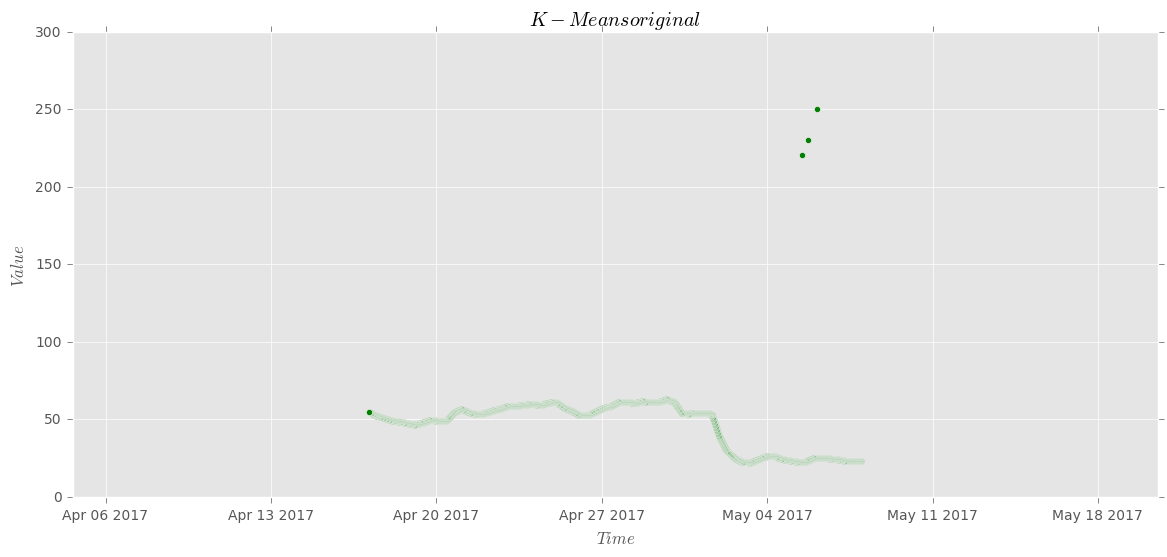

In [25]:
fig, (ax1) = plt.subplots(1, figsize=(14,6))

ax1.scatter(rowDates, rowValues, c="green")
#ax1.scatter(deltaDates, deltaValues, c="green")
#ax1.scatter(deltaDates, posDeltaValues, c="green")


ax1.set_xlabel("$Time$")
ax1.set_ylabel("$Value$")

ax1.set_title("$K-Means original$")
plt.show()

nu =  1
num of samples in the first class :  0    percent:  0.0
num of samples in the secon class :  1998      percent:  0.0
[[   0 1995]
 [   0    3]]
precision :  0.0
recall    :  nan


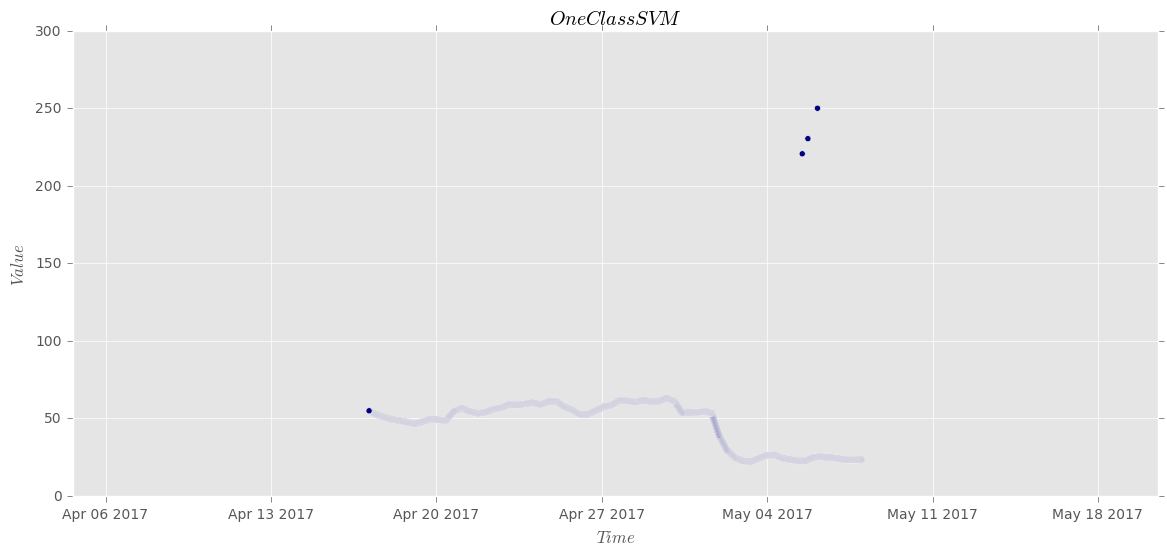

-----------------
nu =  0.9
num of samples in the first class :  200    percent:  0.1001001001001001
num of samples in the secon class :  1798      percent:  0.1001001001001001
[[ 200 1795]
 [   0    3]]
precision :  0.100250626566
recall    :  1.0


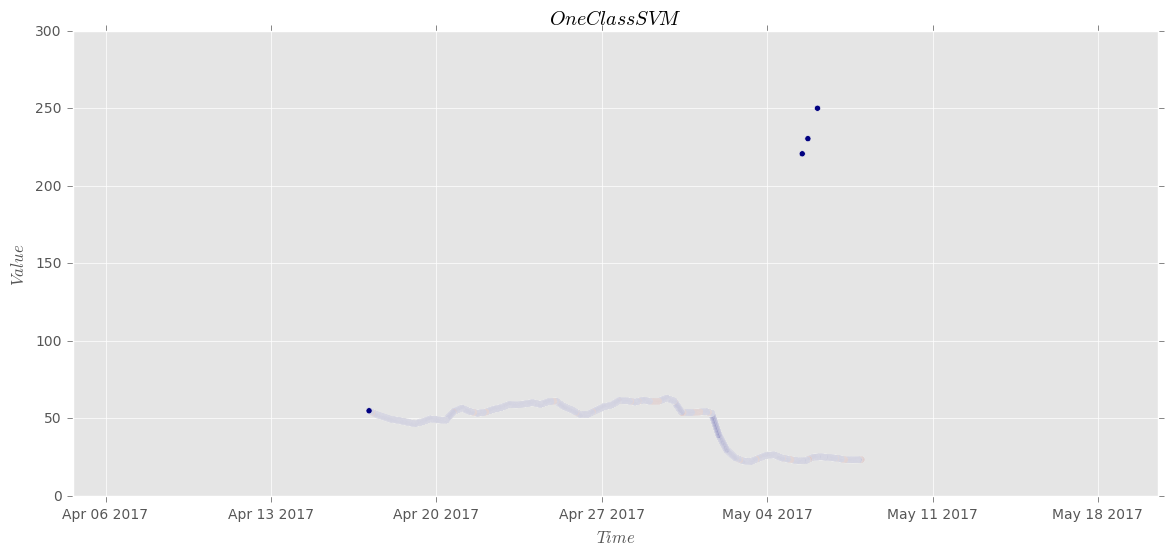

-----------------
nu =  0.8
num of samples in the first class :  401    percent:  0.2007007007007007
num of samples in the secon class :  1597      percent:  0.2007007007007007
[[ 401 1594]
 [   0    3]]
precision :  0.201002506266
recall    :  1.0


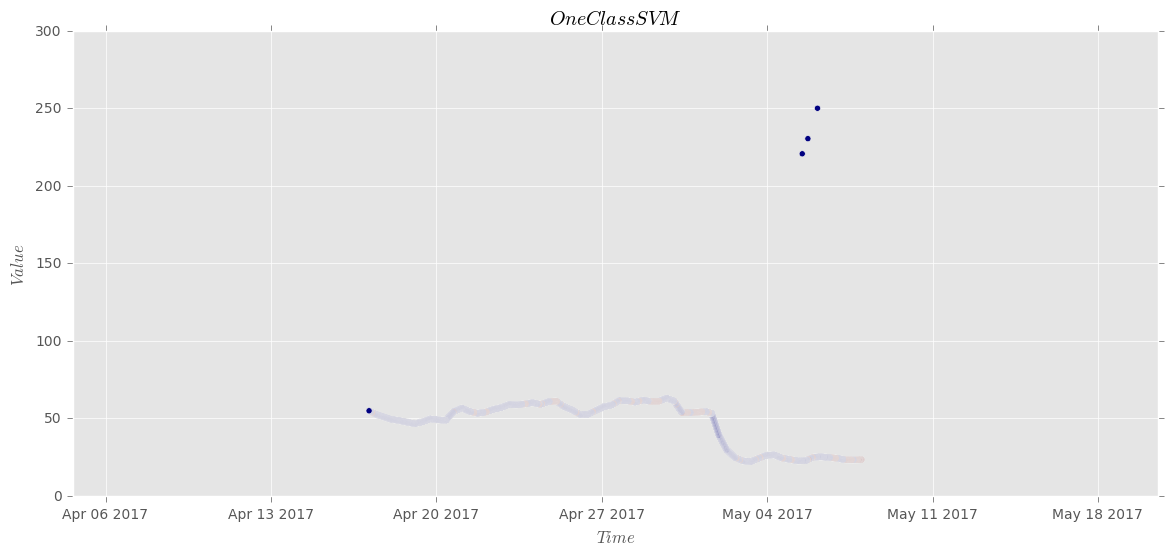

-----------------
nu =  0.7000000000000001
num of samples in the first class :  596    percent:  0.2982982982982983
num of samples in the secon class :  1402      percent:  0.2982982982982983
[[ 596 1399]
 [   0    3]]
precision :  0.298746867168
recall    :  1.0


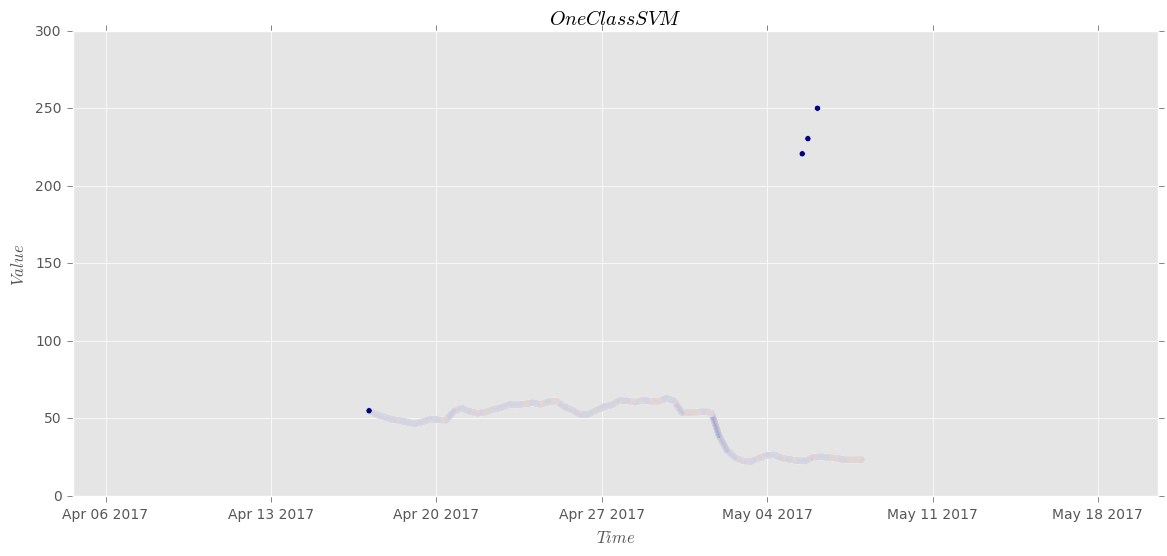

-----------------
nu =  0.6000000000000001
num of samples in the first class :  813    percent:  0.4069069069069069
num of samples in the secon class :  1185      percent:  0.4069069069069069
[[ 813 1182]
 [   0    3]]
precision :  0.407518796992
recall    :  1.0


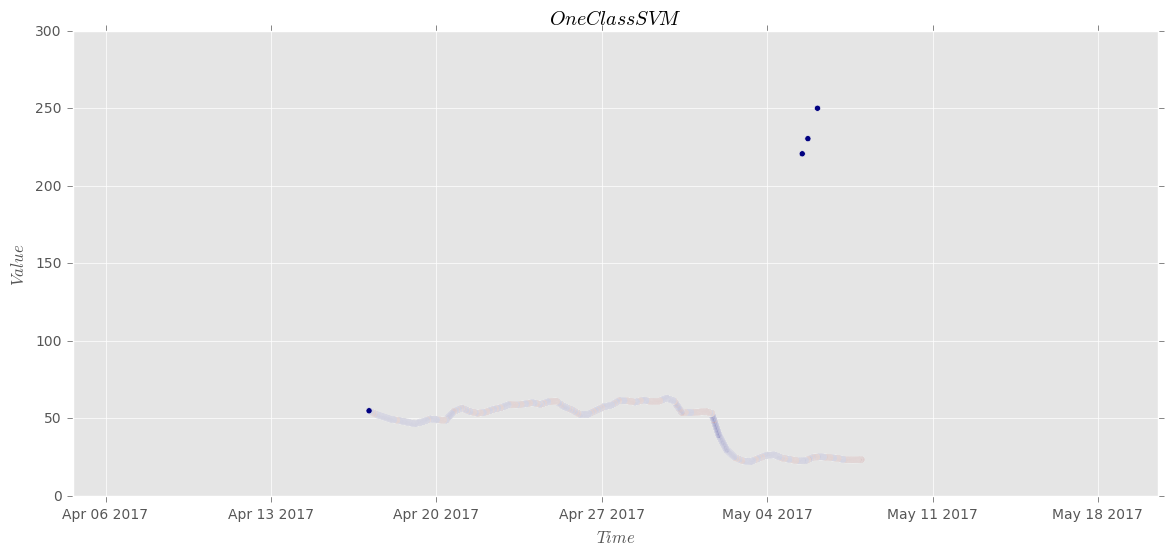

-----------------
nu =  0.5000000000000001
num of samples in the first class :  1000    percent:  0.5005005005005005
num of samples in the secon class :  998      percent:  0.5005005005005005
[[1000  995]
 [   0    3]]
precision :  0.501253132832
recall    :  1.0


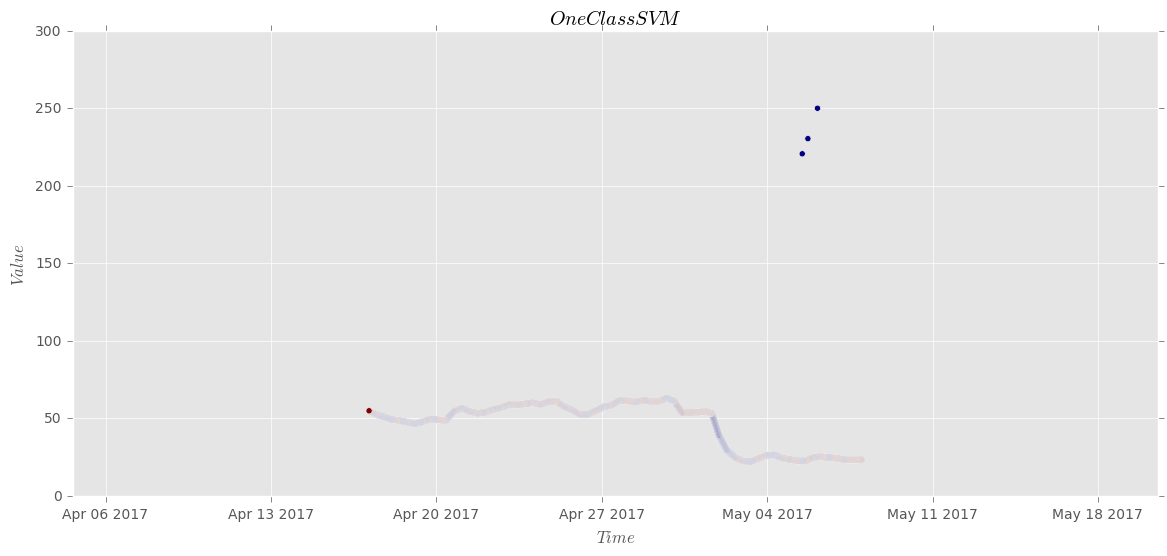

-----------------
nu =  0.40000000000000013
num of samples in the first class :  1162    percent:  0.5815815815815816
num of samples in the secon class :  836      percent:  0.5815815815815816
[[1162  833]
 [   0    3]]
precision :  0.582456140351
recall    :  1.0


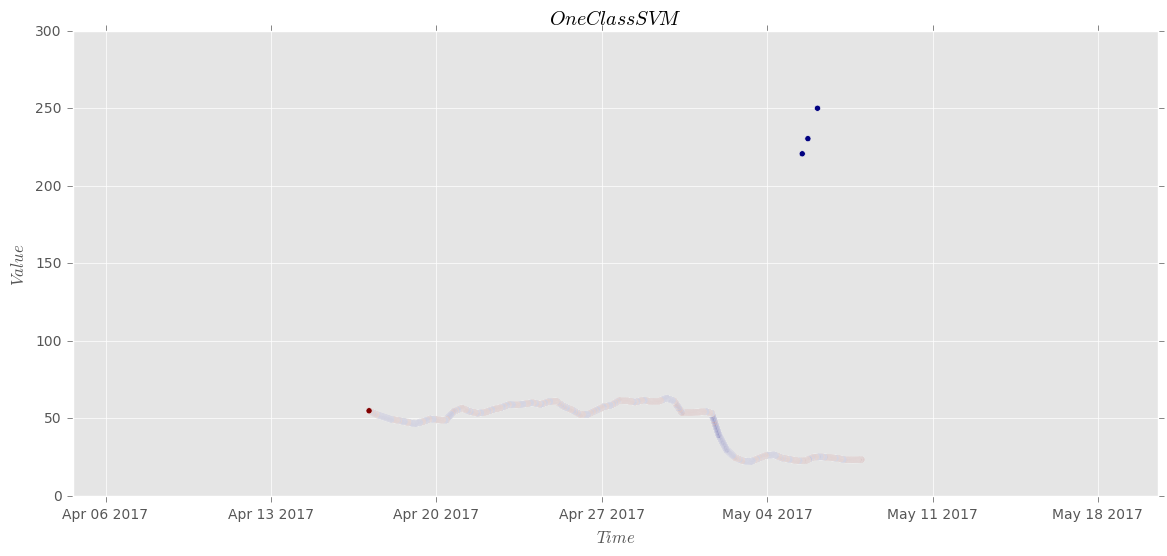

-----------------
nu =  0.30000000000000016
num of samples in the first class :  1246    percent:  0.6236236236236237
num of samples in the secon class :  752      percent:  0.6236236236236237
[[1246  749]
 [   0    3]]
precision :  0.624561403509
recall    :  1.0


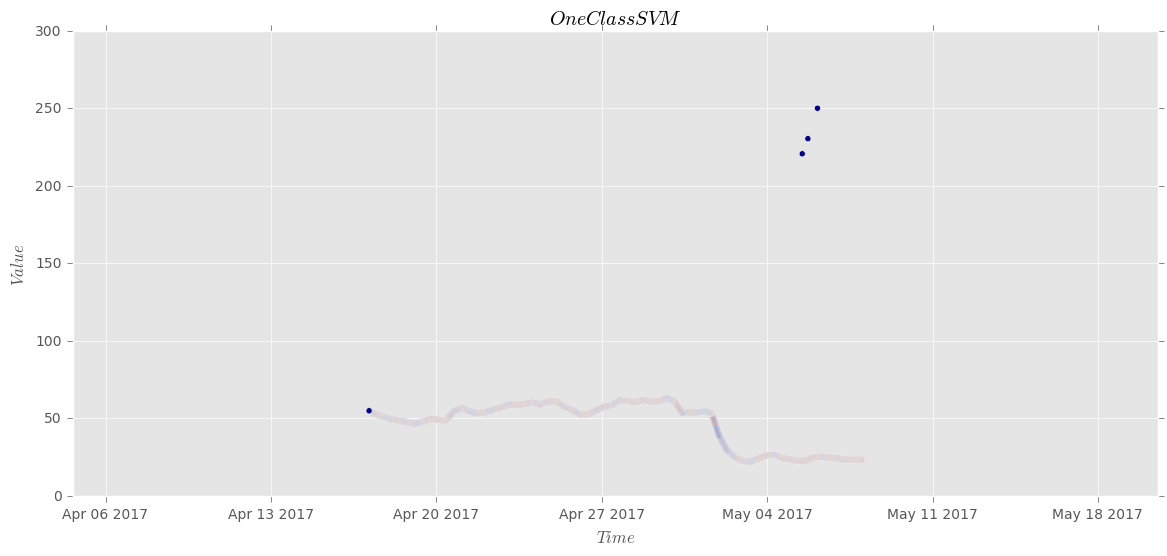

-----------------
nu =  0.20000000000000015
num of samples in the first class :  1478    percent:  0.7397397397397397
num of samples in the secon class :  520      percent:  0.7397397397397397
[[1478  517]
 [   0    3]]
precision :  0.740852130326
recall    :  1.0


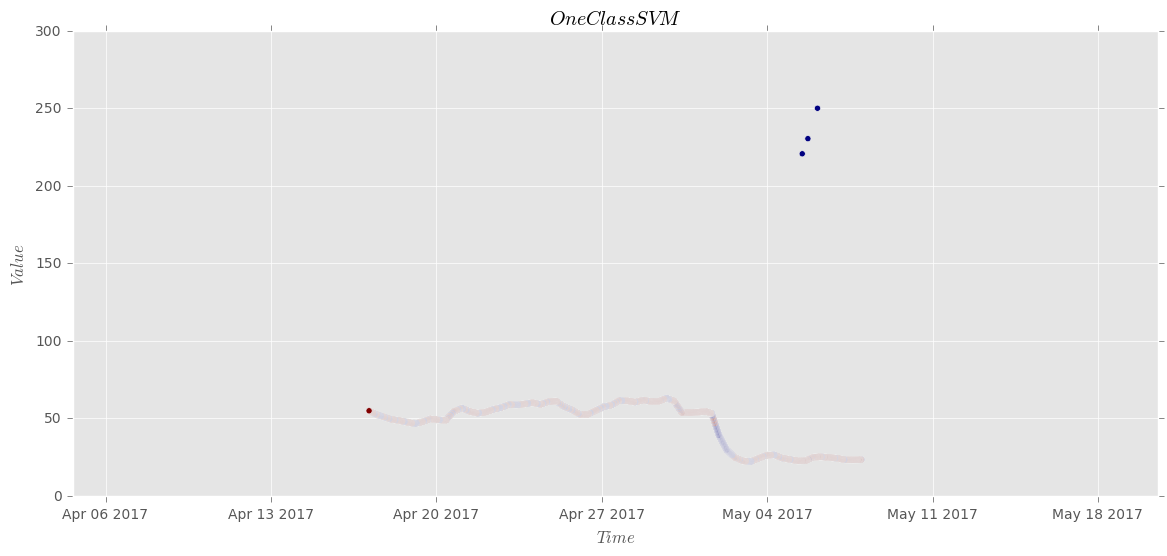

-----------------
nu =  0.10000000000000014
num of samples in the first class :  1561    percent:  0.7812812812812813
num of samples in the secon class :  437      percent:  0.7812812812812813
[[1561  434]
 [   0    3]]
precision :  0.782456140351
recall    :  1.0


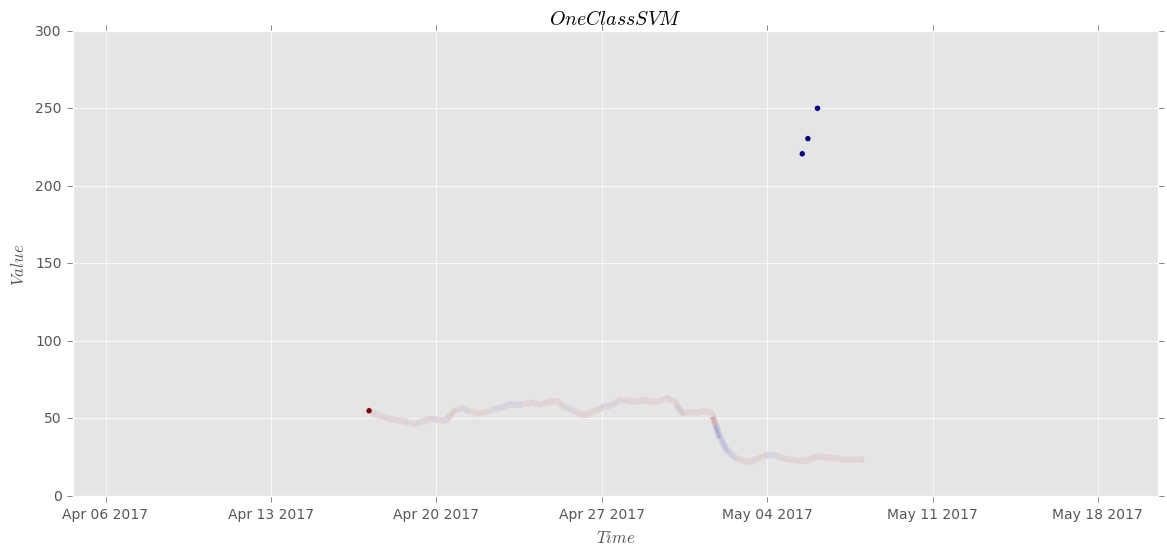

-----------------
nu =  1.3877787807814457e-16
num of samples in the first class :  0    percent:  0.0
num of samples in the secon class :  1998      percent:  0.0
[[   0 1995]
 [   0    3]]
precision :  0.0
recall    :  nan


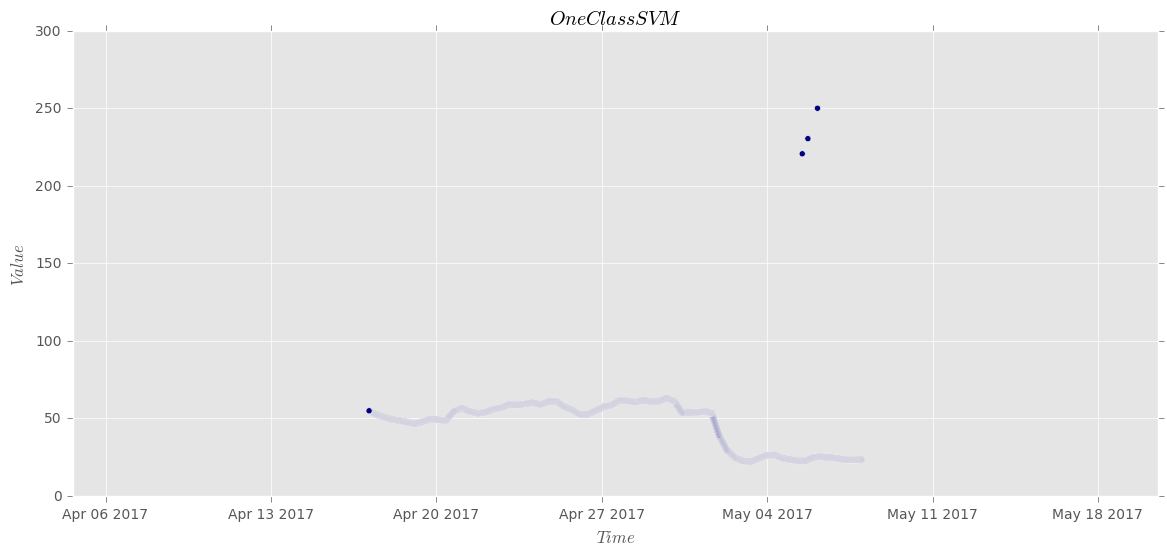

-----------------
nu = 0


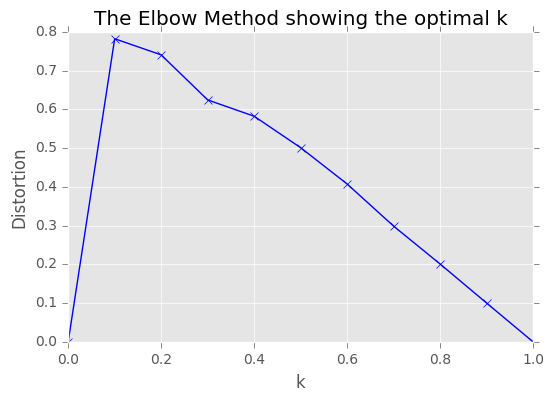

In [57]:
values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
outlierList = outlier
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]


nuList = []
preList = []

x = 1
while(x != 0):
    if(x > 0):
        print("nu = ", x)
        nuList.append(x)
        #clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.0001)
        clf = svm.OneClassSVM(nu=x)
        clf.fit(values)
        predicted = clf.predict(values)

        counterFirst = 0
        counterSec = 0
        counts= []
        predictedNew = []
        for i in predicted:
            if i == 1: 
                predictedNew.append(0)
                counterFirst = counterFirst + 1
            else:
                predictedNew.append(1)
                counterSec = counterSec + 1

        cm = confusion_matrix(outlierList, predictedNew, labels=[0,1])

        #print((outlierList))
        #print((predictedNew))

        print ("num of samples in the first class : ", counterFirst, "   percent: ", counterFirst / len(values))
        print ("num of samples in the secon class : ", counterSec, "     percent: ", counterFirst / len(values))
        print(cm)
        precision = calculatePrecision(cm)
        recall = calculateRecall(cm)
        print("precision : ", precision)
        print("recall    : " ,recall)
        preList.append(precision)

        plotTheclusteredData(dates, values, predicted, titel= "$OneClassSVM$")
        
        x = x-0.1
        print("-----------------")
    else:
        print("nu = 0")
        break
plotTheElbow(nuList ,preList)

nu =  0.1
num of samples in the first class :  1603    percent:  0.8023023023023023
num of samples in the secon class :  395      percent:  0.8023023023023023
[[1603  392]
 [   0    3]]
precision :  0.80350877193
recall    :  1.0


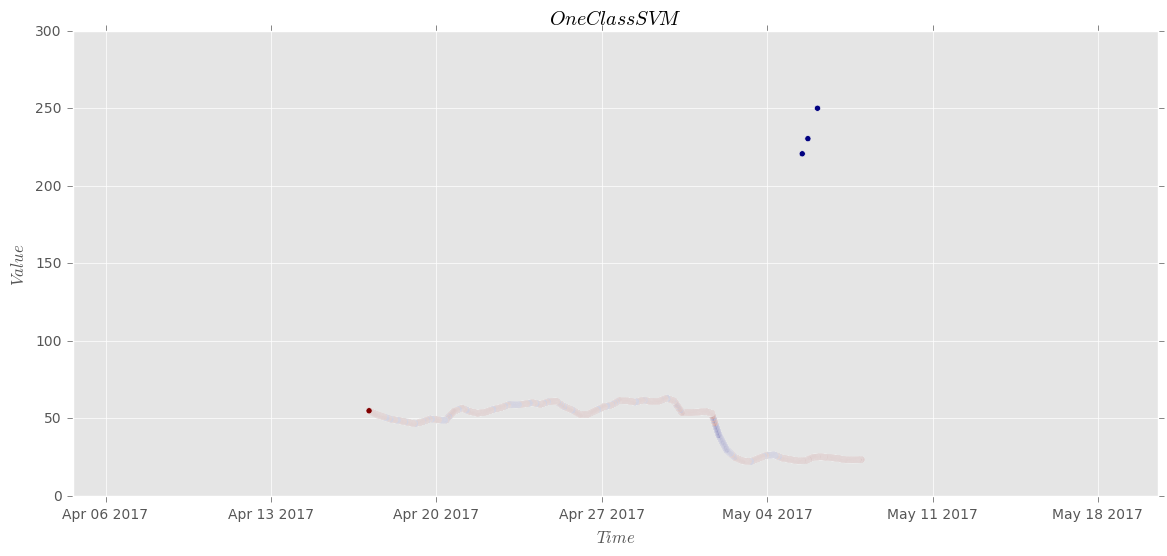

-----------------
nu =  0.09000000000000001
num of samples in the first class :  1449    percent:  0.7252252252252253
num of samples in the secon class :  549      percent:  0.7252252252252253
[[1449  546]
 [   0    3]]
precision :  0.726315789474
recall    :  1.0


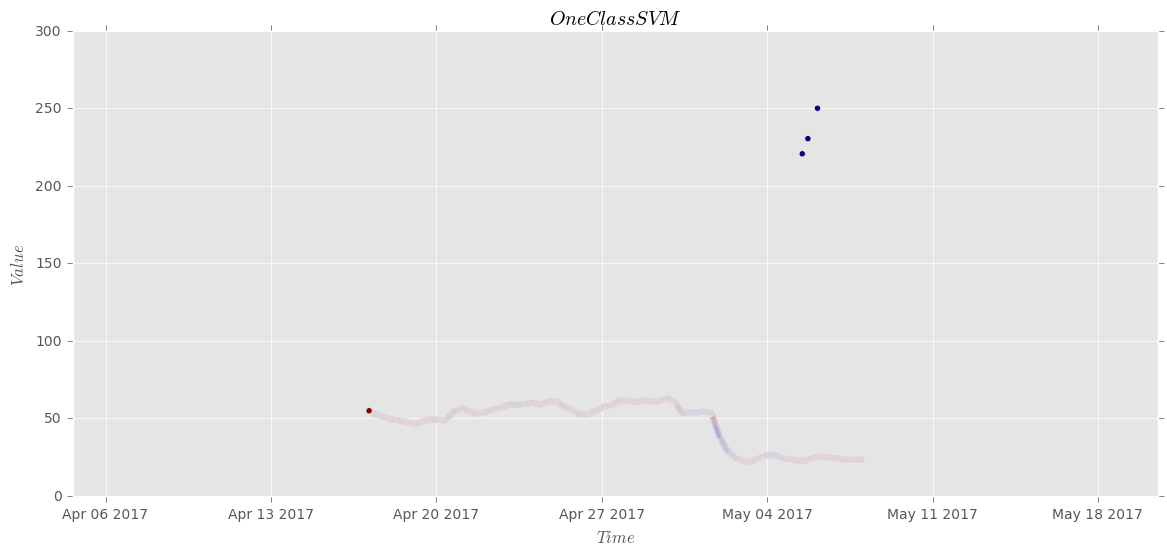

-----------------
nu =  0.08000000000000002
num of samples in the first class :  1468    percent:  0.7347347347347347
num of samples in the secon class :  530      percent:  0.7347347347347347
[[1468  527]
 [   0    3]]
precision :  0.735839598997
recall    :  1.0


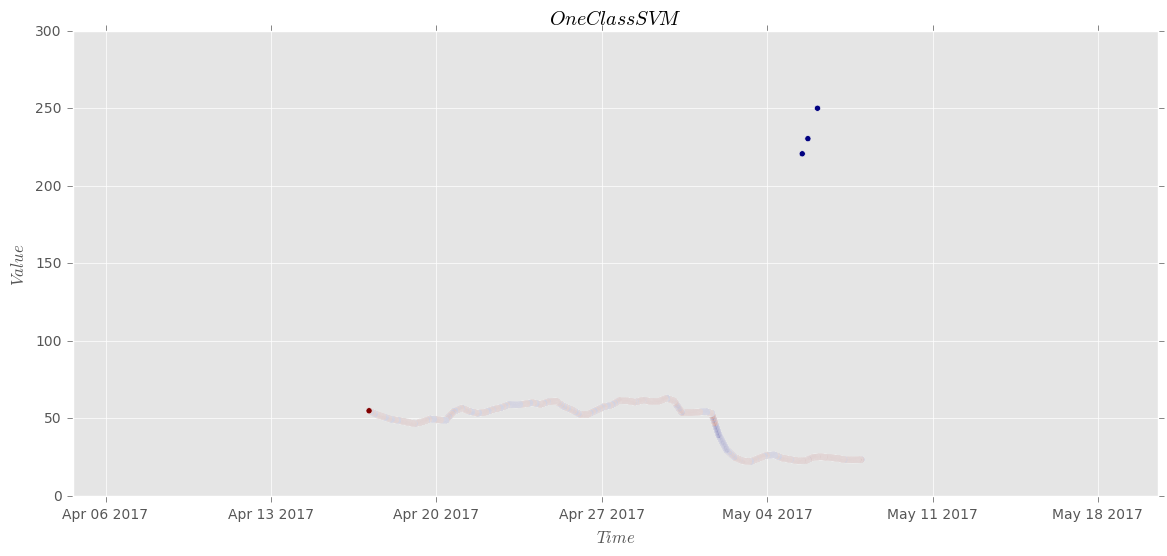

-----------------
nu =  0.07000000000000002
num of samples in the first class :  1510    percent:  0.7557557557557557
num of samples in the secon class :  488      percent:  0.7557557557557557
[[1510  485]
 [   0    3]]
precision :  0.756892230576
recall    :  1.0


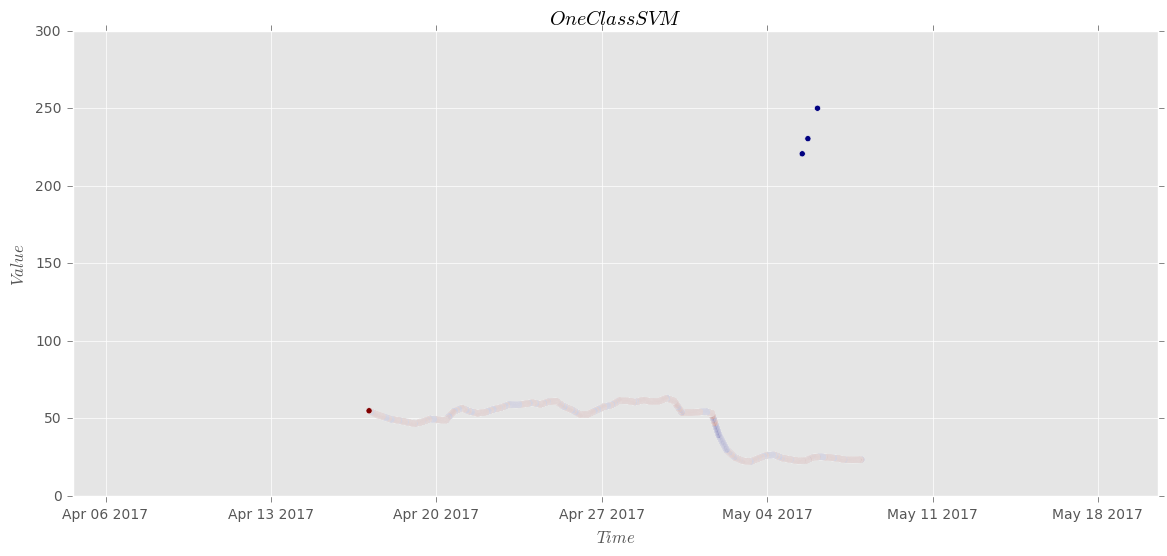

-----------------
nu =  0.06000000000000002
num of samples in the first class :  1518    percent:  0.7597597597597597
num of samples in the secon class :  480      percent:  0.7597597597597597
[[1518  477]
 [   0    3]]
precision :  0.760902255639
recall    :  1.0


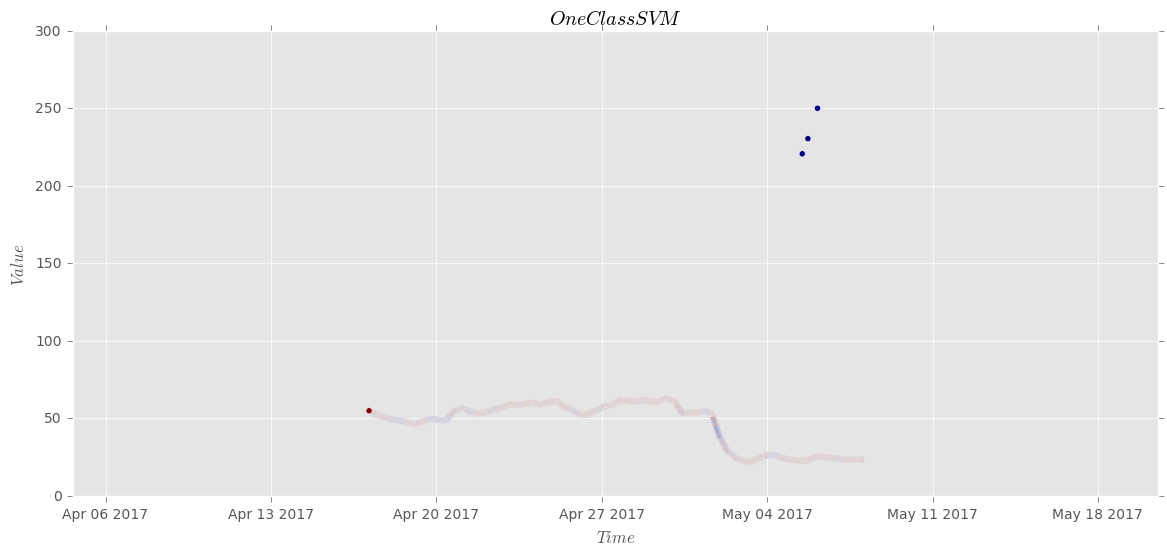

-----------------
nu =  0.05000000000000002
num of samples in the first class :  1476    percent:  0.7387387387387387
num of samples in the secon class :  522      percent:  0.7387387387387387
[[1476  519]
 [   0    3]]
precision :  0.73984962406
recall    :  1.0


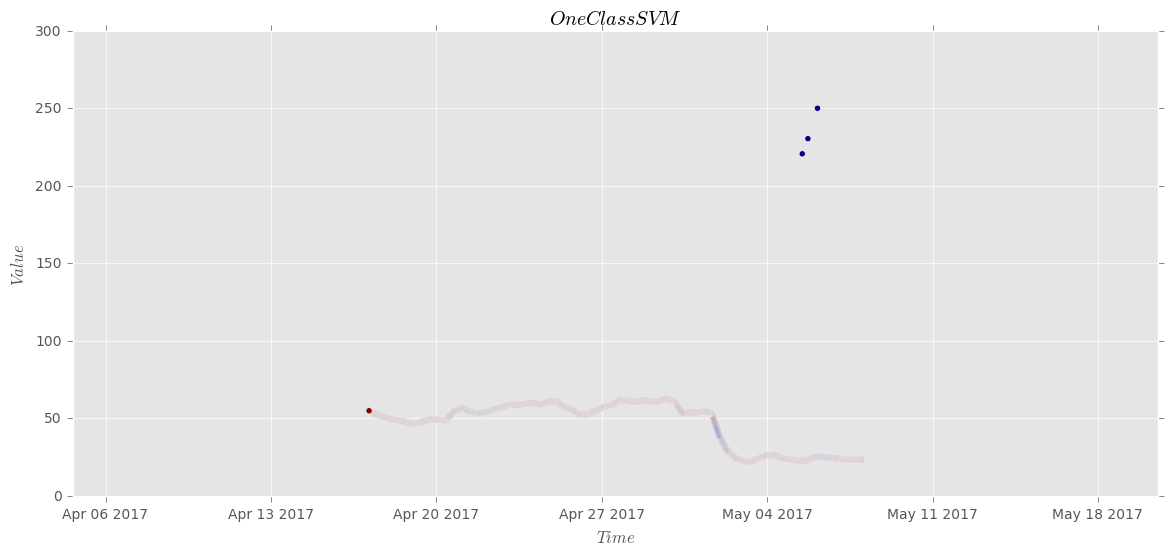

-----------------
nu =  0.040000000000000015
num of samples in the first class :  1458    percent:  0.7297297297297297
num of samples in the secon class :  540      percent:  0.7297297297297297
[[1458  537]
 [   0    3]]
precision :  0.730827067669
recall    :  1.0


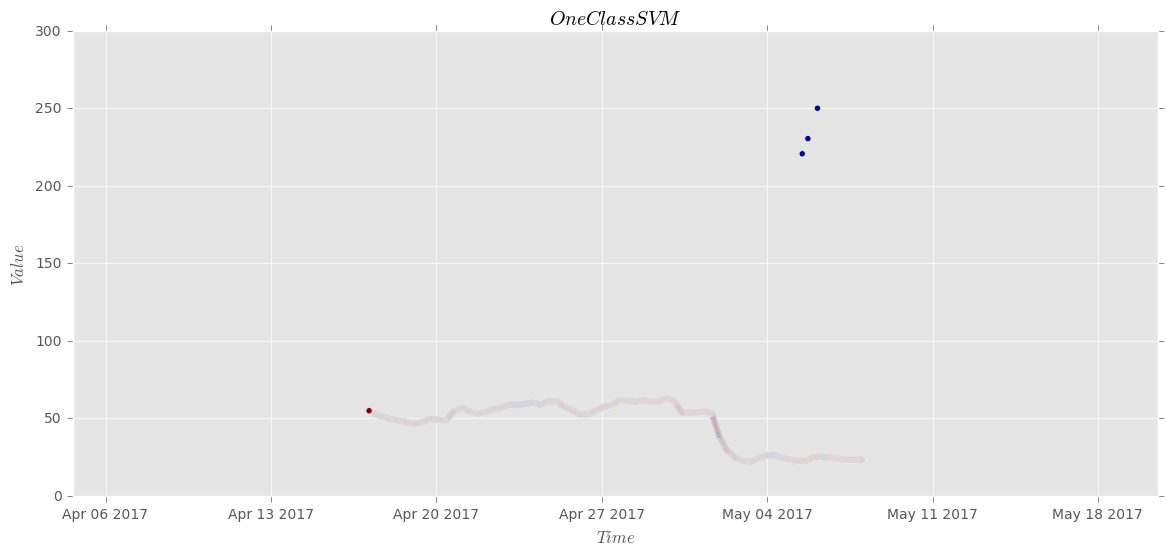

-----------------
nu =  0.030000000000000013
num of samples in the first class :  1518    percent:  0.7597597597597597
num of samples in the secon class :  480      percent:  0.7597597597597597
[[1518  477]
 [   0    3]]
precision :  0.760902255639
recall    :  1.0


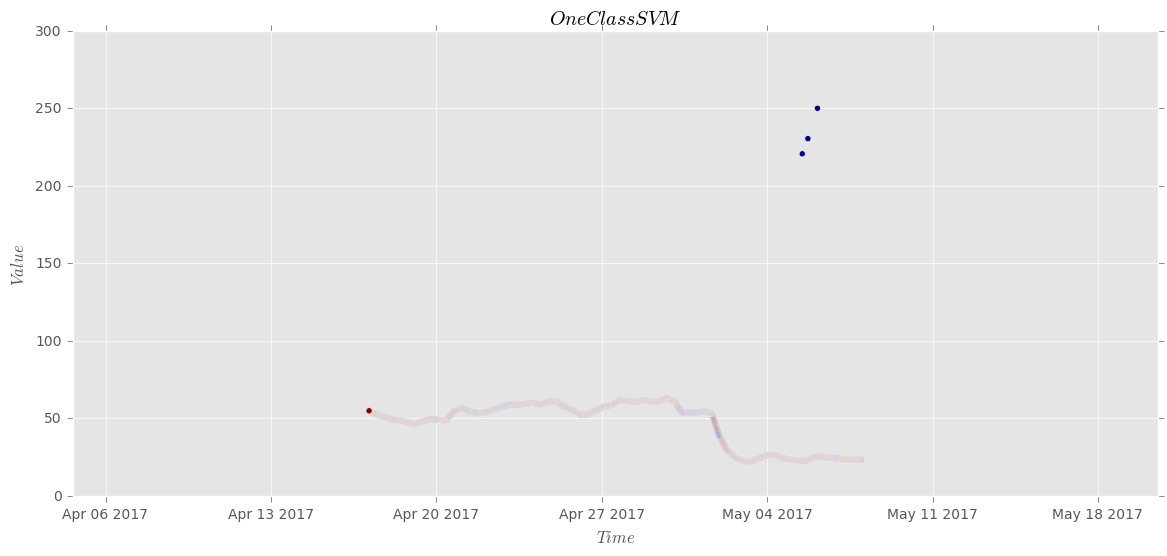

-----------------
nu =  0.02000000000000001
num of samples in the first class :  1601    percent:  0.8013013013013013
num of samples in the secon class :  397      percent:  0.8013013013013013
[[1601  394]
 [   0    3]]
precision :  0.802506265664
recall    :  1.0


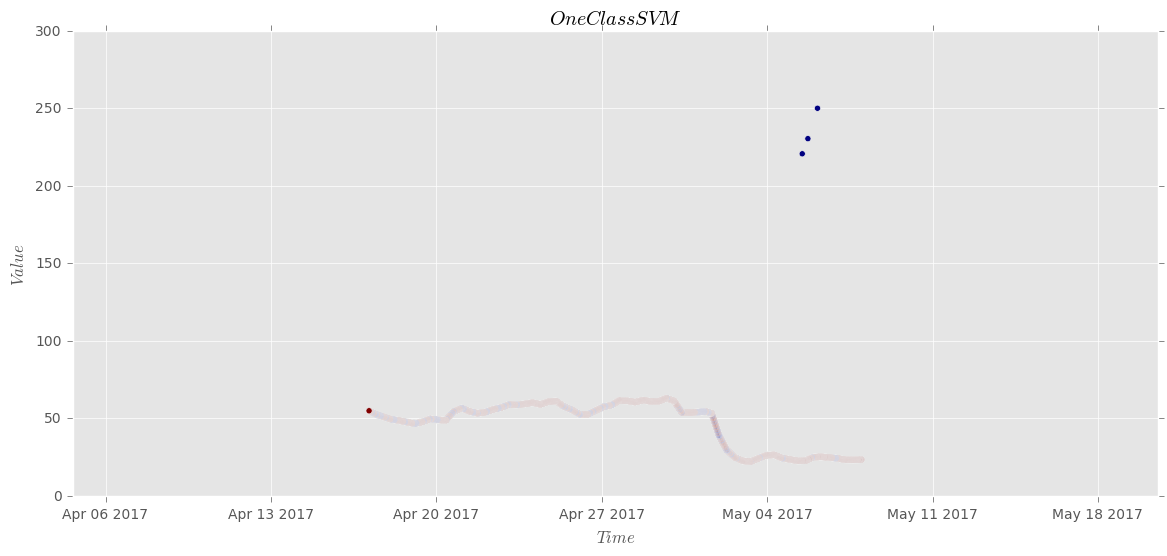

-----------------
nu =  0.01000000000000001
num of samples in the first class :  1628    percent:  0.8148148148148148
num of samples in the secon class :  370      percent:  0.8148148148148148
[[1627  368]
 [   1    2]]
precision :  0.815538847118
recall    :  0.999385749386


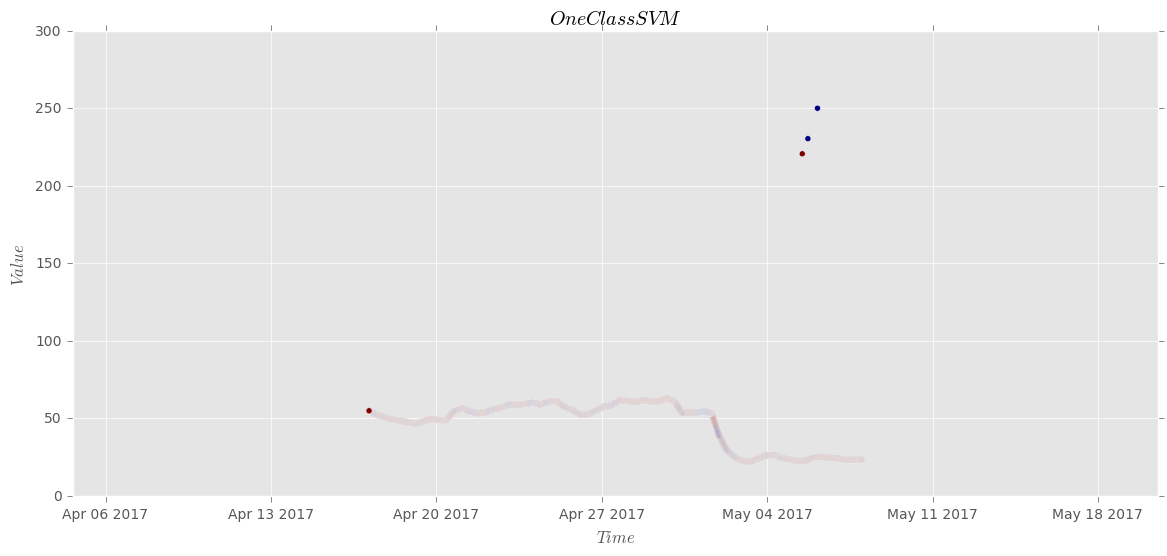

-----------------
nu =  1.0408340855860843e-17
num of samples in the first class :  0    percent:  0.0
num of samples in the secon class :  1998      percent:  0.0
[[   0 1995]
 [   0    3]]
precision :  0.0
recall    :  nan


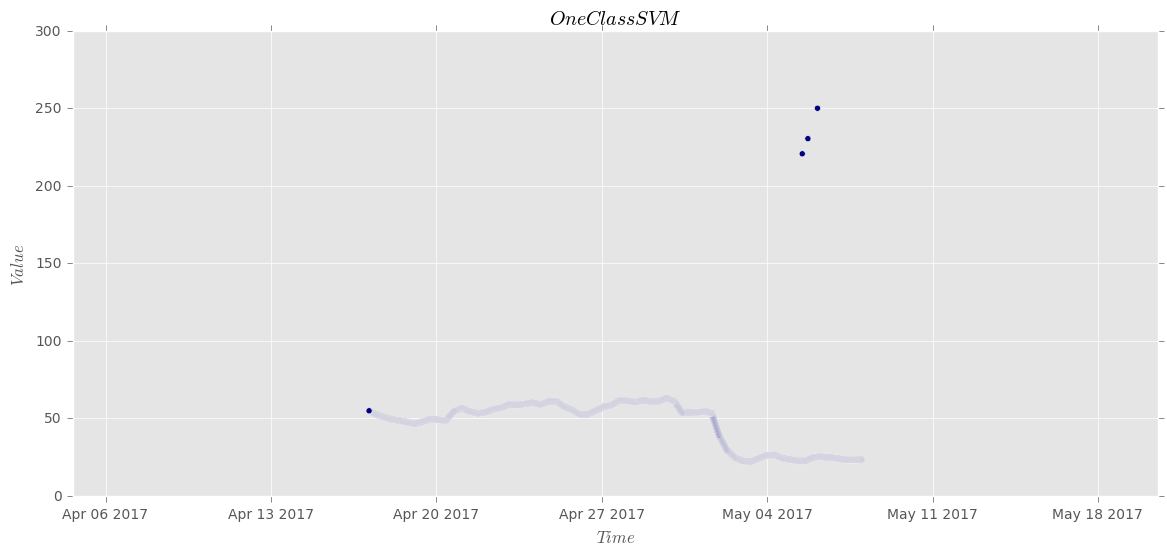

-----------------
nu = 0


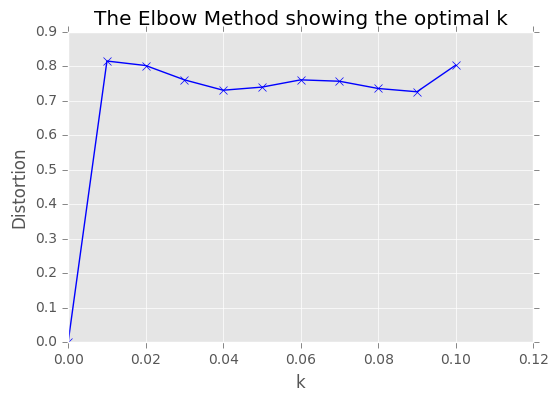

In [52]:
values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
outlierList = outlier
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]

nuList = []
preList = []

x = 0.1
while(x != 0):
    if(x > 0):
        print("nu = ", x)
        nuList.append(x)
        #clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.0001)
        clf = svm.OneClassSVM(nu=x)
        clf.fit(values)
        predicted = clf.predict(values)

        counterFirst = 0
        counterSec = 0
        counts= []
        predictedNew = []
        for i in predicted:
            if i == 1: 
                predictedNew.append(0)
                counterFirst = counterFirst + 1
            else:
                predictedNew.append(1)
                counterSec = counterSec + 1

        cm = confusion_matrix(outlierList, predictedNew)
        print ("num of samples in the first class : ", counterFirst, "   percent: ", counterFirst / len(values))
        print ("num of samples in the secon class : ", counterSec, "     percent: ", counterFirst / len(values))
        print(cm)
        precision = calculatePrecision(cm)
        recall = calculateRecall(cm)
        print("precision : ", precision)
        print("recall    : " ,recall)
        preList.append(precision)

        plotTheclusteredData(dates, values, predicted, titel= "$OneClassSVM$")
        x = x-0.01
        print("-----------------")
    else:
        print("nu = 0")
        break

plotTheElbow(nuList ,preList)

nu =  0.01
num of samples in the first class :  1628    percent:  0.8148148148148148
num of samples in the secon class :  370      percent:  0.8148148148148148
[[1627  368]
 [   1    2]]
precision :  0.815538847118
recall    :  0.999385749386


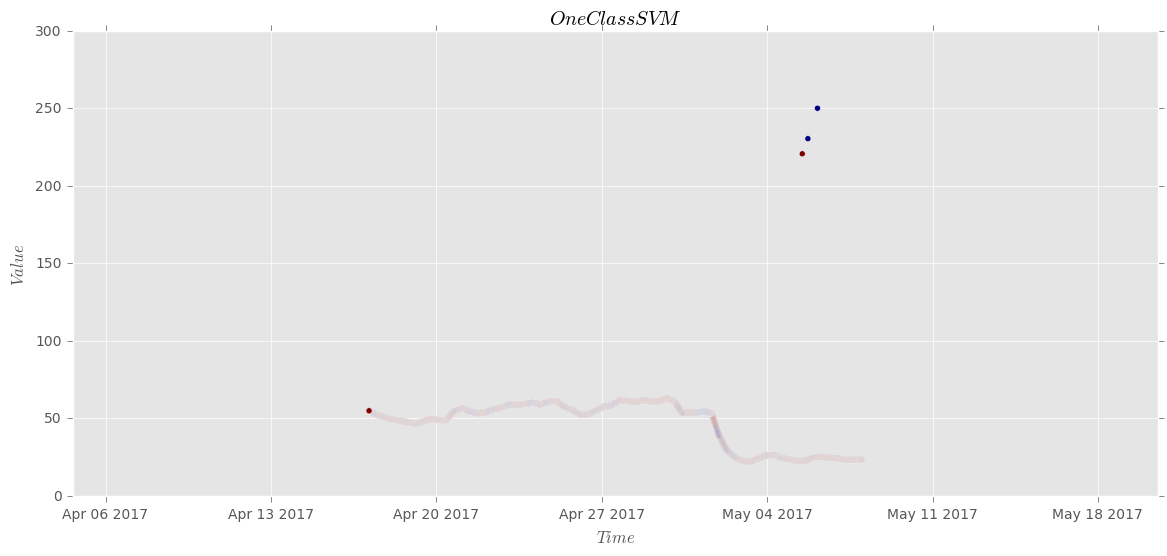

-----------------
nu =  0.009000000000000001
num of samples in the first class :  1618    percent:  0.8098098098098098
num of samples in the secon class :  380      percent:  0.8098098098098098
[[1618  377]
 [   0    3]]
precision :  0.811027568922
recall    :  1.0


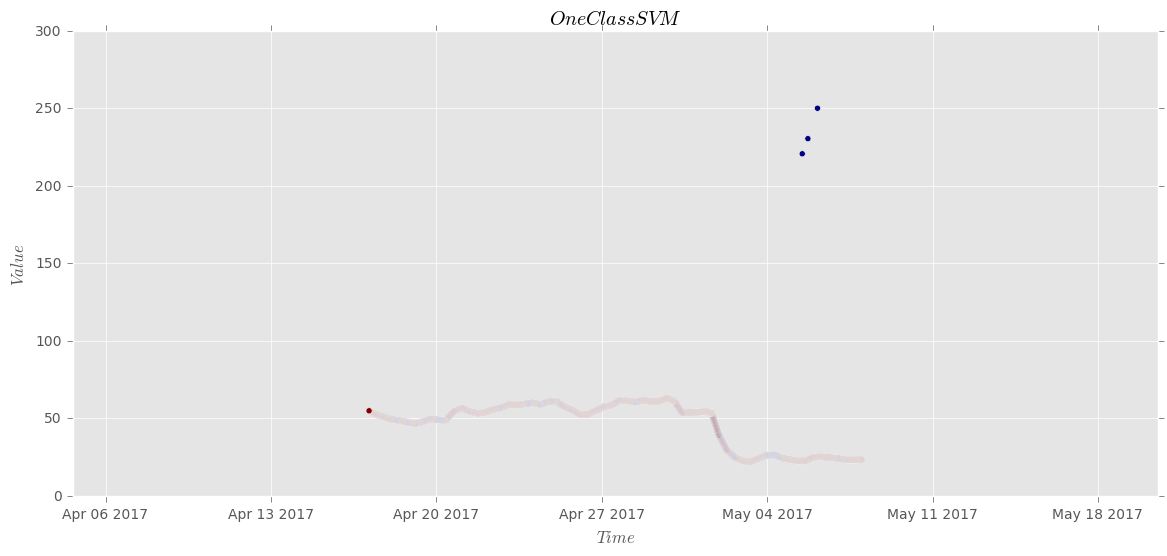

-----------------
nu =  0.008
num of samples in the first class :  1567    percent:  0.7842842842842843
num of samples in the secon class :  431      percent:  0.7842842842842843
[[1565  430]
 [   2    1]]
precision :  0.784461152882
recall    :  0.998723675814


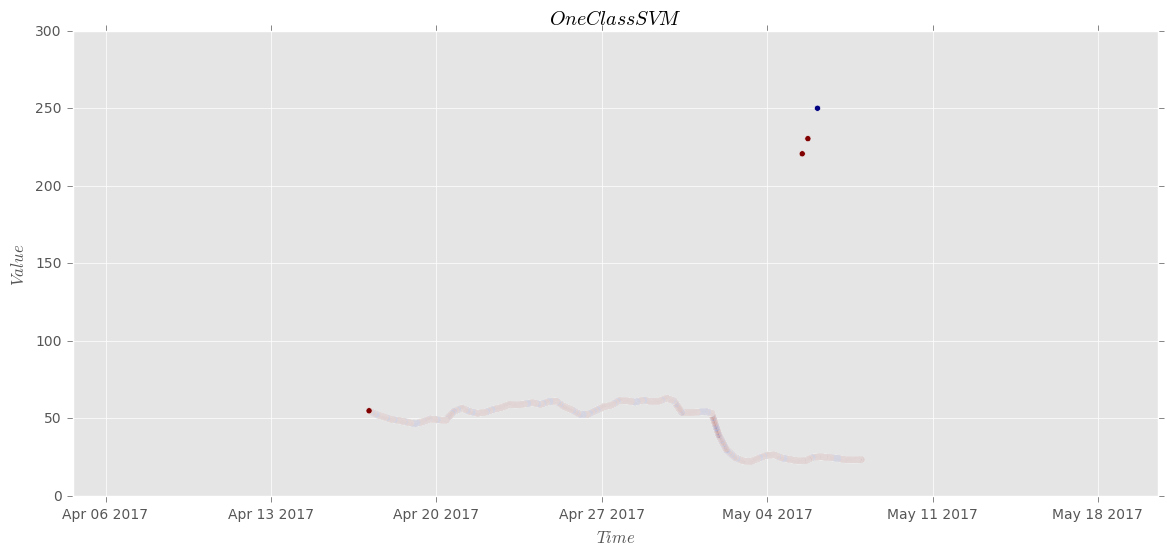

-----------------
nu =  0.007
num of samples in the first class :  1561    percent:  0.7812812812812813
num of samples in the secon class :  437      percent:  0.7812812812812813
[[1558  437]
 [   3    0]]
precision :  0.780952380952
recall    :  0.998078155029


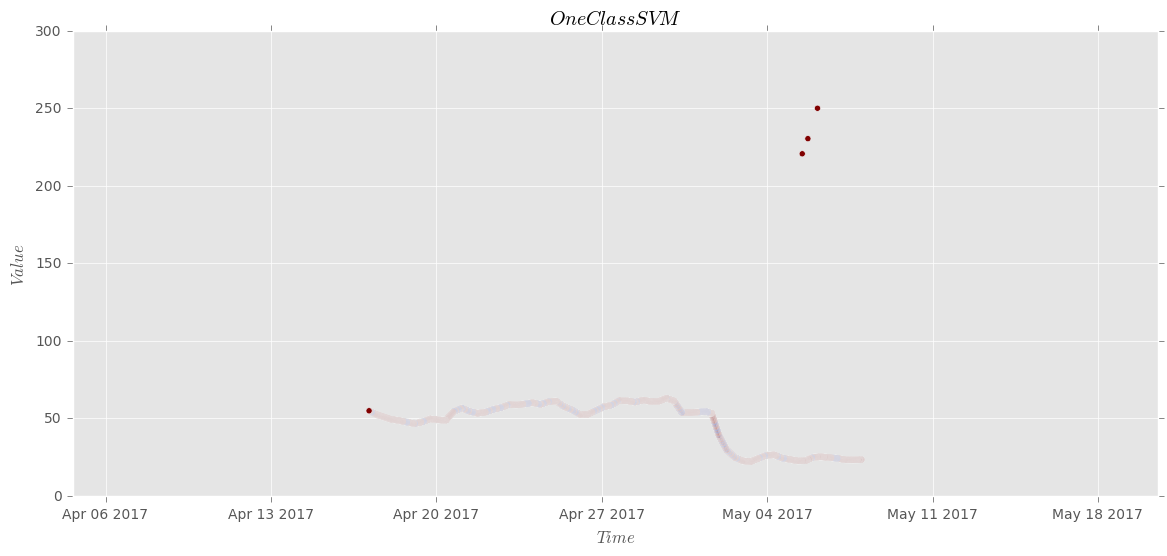

-----------------
nu =  0.006
num of samples in the first class :  1417    percent:  0.7092092092092092
num of samples in the secon class :  581      percent:  0.7092092092092092
[[1415  580]
 [   2    1]]
precision :  0.709273182957
recall    :  0.998588567396


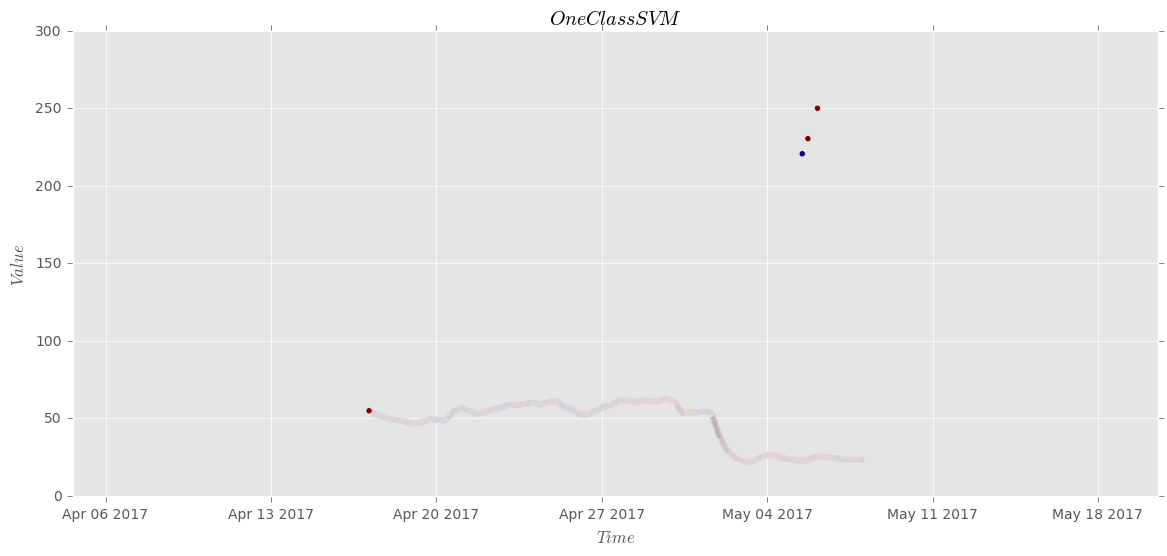

-----------------
nu =  0.005
num of samples in the first class :  1502    percent:  0.7517517517517518
num of samples in the secon class :  496      percent:  0.7517517517517518
[[1499  496]
 [   3    0]]
precision :  0.751378446115
recall    :  0.998002663116


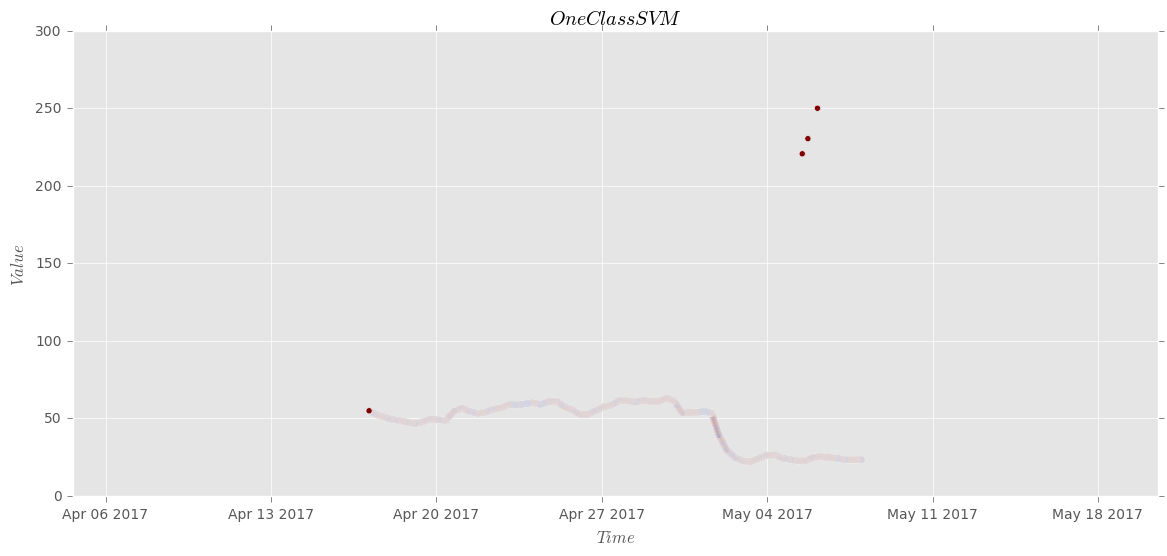

-----------------
nu =  0.004
num of samples in the first class :  1462    percent:  0.7317317317317318
num of samples in the secon class :  536      percent:  0.7317317317317318
[[1461  534]
 [   1    2]]
precision :  0.732330827068
recall    :  0.999316005472


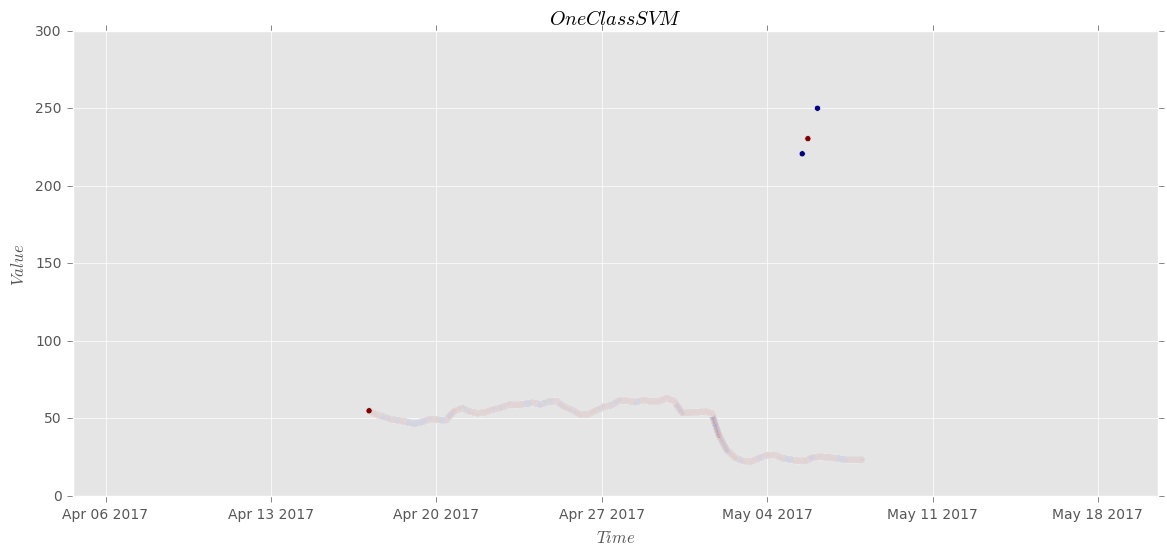

-----------------
nu =  0.003
num of samples in the first class :  1542    percent:  0.7717717717717718
num of samples in the secon class :  456      percent:  0.7717717717717718
[[1539  456]
 [   3    0]]
precision :  0.771428571429
recall    :  0.998054474708


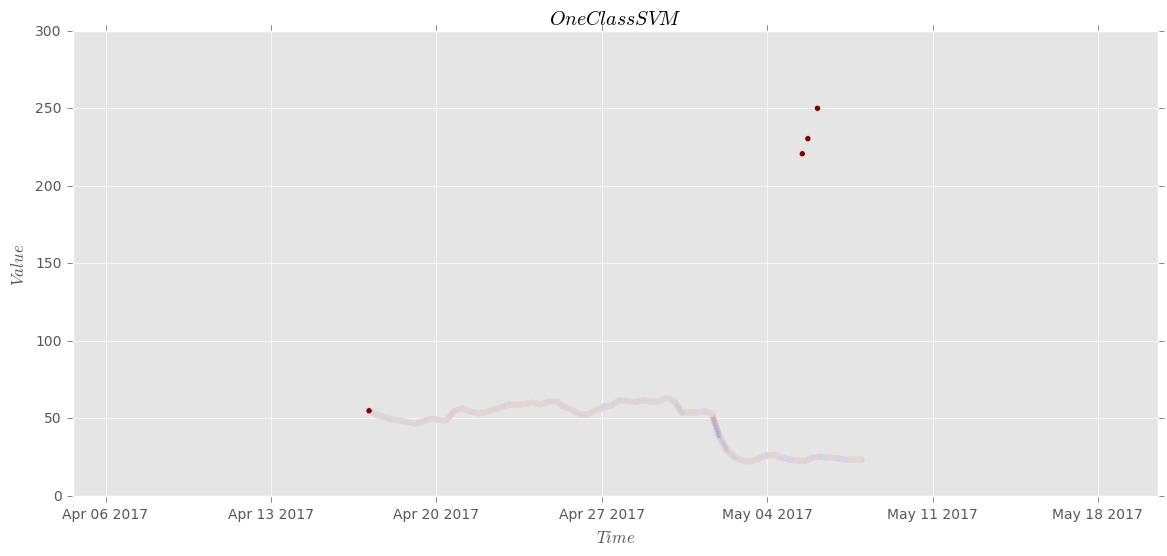

-----------------
nu =  0.002
num of samples in the first class :  1683    percent:  0.8423423423423423
num of samples in the secon class :  315      percent:  0.8423423423423423
[[1680  315]
 [   3    0]]
precision :  0.842105263158
recall    :  0.998217468806


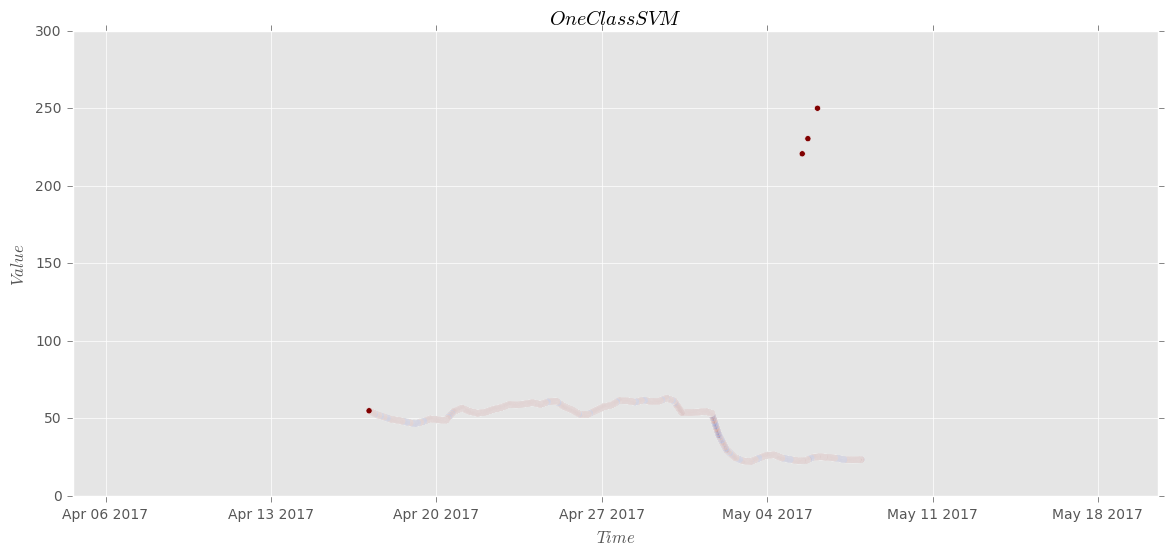

-----------------
nu =  0.001
num of samples in the first class :  1520    percent:  0.7607607607607607
num of samples in the secon class :  478      percent:  0.7607607607607607
[[1517  478]
 [   3    0]]
precision :  0.760401002506
recall    :  0.998026315789


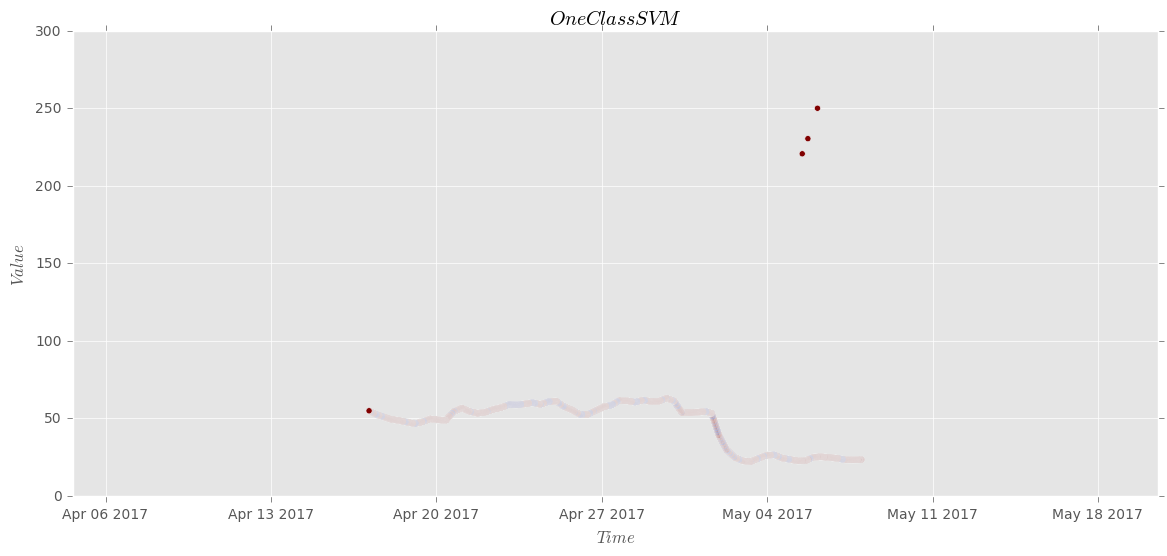

-----------------


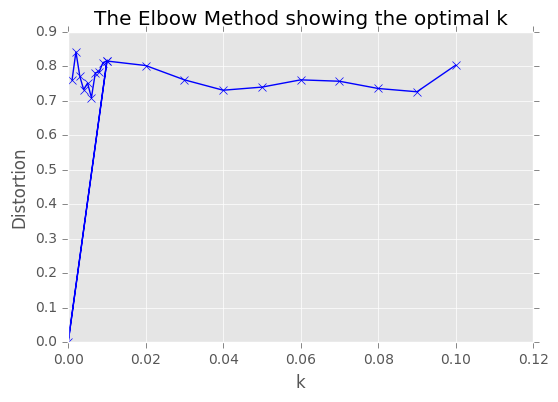

In [53]:
values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
outlierList = outlier
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]


x = 0.01
while(x != 0):
    if(x > 0):
        print("nu = ", x)
        nuList.append(x)
        #clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.0001)
        clf = svm.OneClassSVM(nu=x)
        clf.fit(values)
        predicted = clf.predict(values)

        counterFirst = 0
        counterSec = 0
        counts= []
        predictedNew = []
        for i in predicted:
            if i == 1: 
                predictedNew.append(0)
                counterFirst = counterFirst + 1
            else:
                predictedNew.append(1)
                counterSec = counterSec + 1

        cm = confusion_matrix(outlierList, predictedNew)
        print ("num of samples in the first class : ", counterFirst, "   percent: ", counterFirst / len(values))
        print ("num of samples in the secon class : ", counterSec, "     percent: ", counterFirst / len(values))
        print(cm)
        precision = calculatePrecision(cm)
        recall = calculateRecall(cm)
        preList.append(precision)

        print("precision : ", precision)
        print("recall    : " ,recall)
        plotTheclusteredData(dates, values, predicted, titel= "$OneClassSVM$")
        x = x-0.001
        print("-----------------")
    else:
        print("nu = 0")
        break
plotTheElbow(nuList ,preList)

nu =  0.002
num of samples in the first class :  1683    percent:  0.8423423423423423
num of samples in the secon class :  315      percent:  0.8423423423423423
[[1680  315]
 [   3    0]]
precision :  0.842105263158
recall    :  0.998217468806


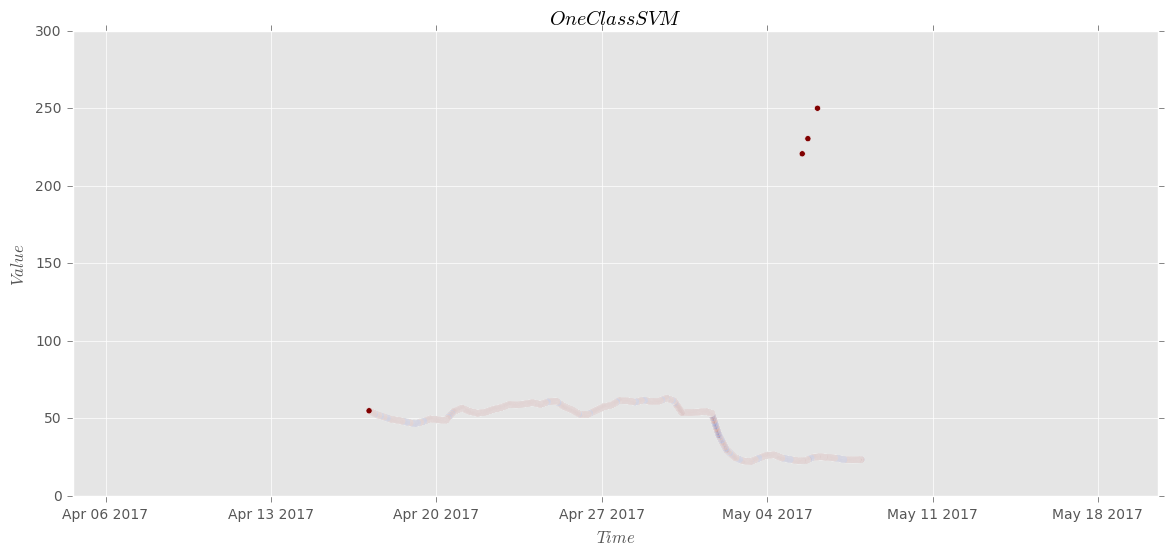

-----------------
nu =  0.0019
num of samples in the first class :  1387    percent:  0.6941941941941941
num of samples in the secon class :  611      percent:  0.6941941941941941
[[1385  610]
 [   2    1]]
precision :  0.694235588972
recall    :  0.998558038933


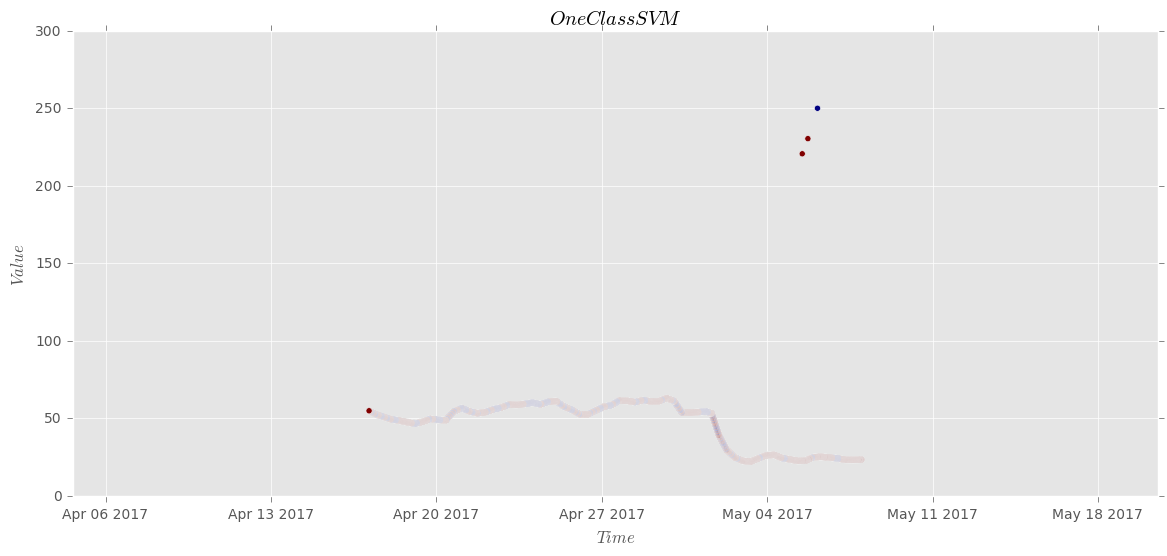

-----------------
nu =  0.0018
num of samples in the first class :  1383    percent:  0.6921921921921922
num of samples in the secon class :  615      percent:  0.6921921921921922
[[1382  613]
 [   1    2]]
precision :  0.692731829574
recall    :  0.999276934201


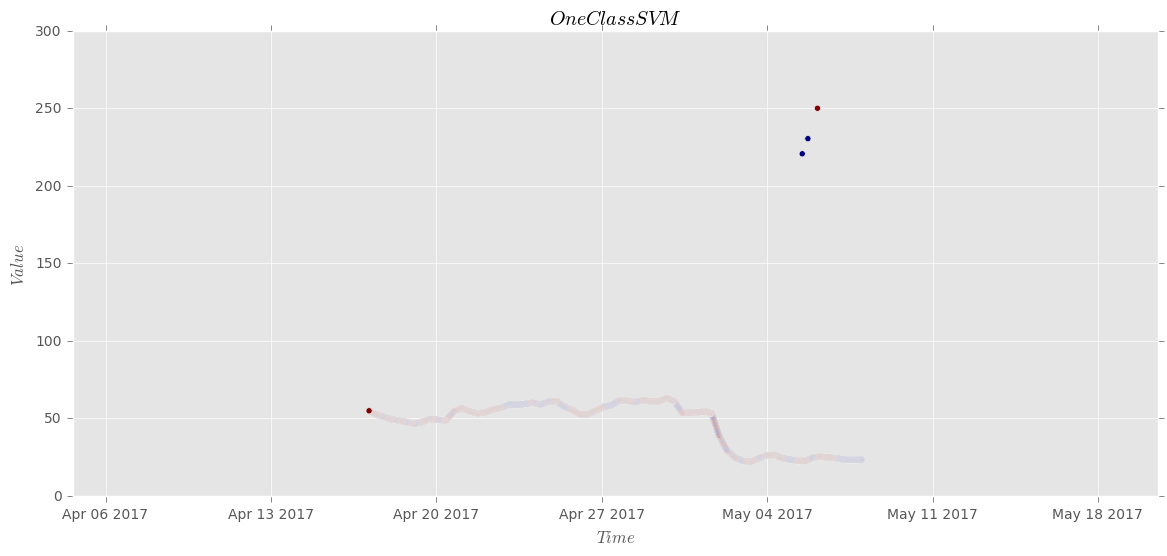

-----------------
nu =  0.0017
num of samples in the first class :  1421    percent:  0.7112112112112112
num of samples in the secon class :  577      percent:  0.7112112112112112
[[1419  576]
 [   2    1]]
precision :  0.711278195489
recall    :  0.998592540464


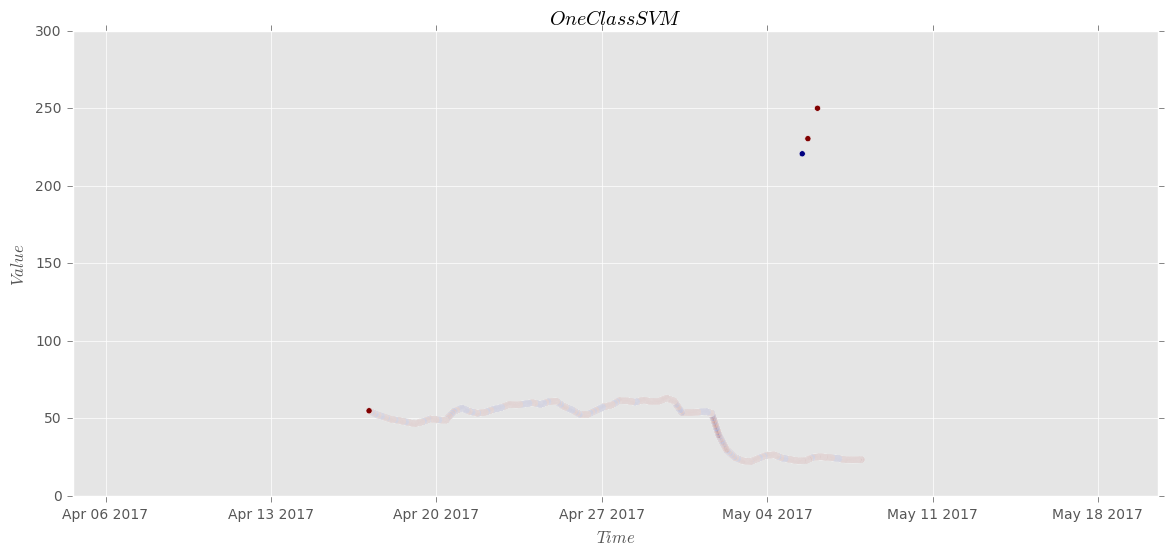

-----------------
nu =  0.0015999999999999999
num of samples in the first class :  1490    percent:  0.7457457457457457
num of samples in the secon class :  508      percent:  0.7457457457457457
[[1488  507]
 [   2    1]]
precision :  0.745864661654
recall    :  0.998657718121


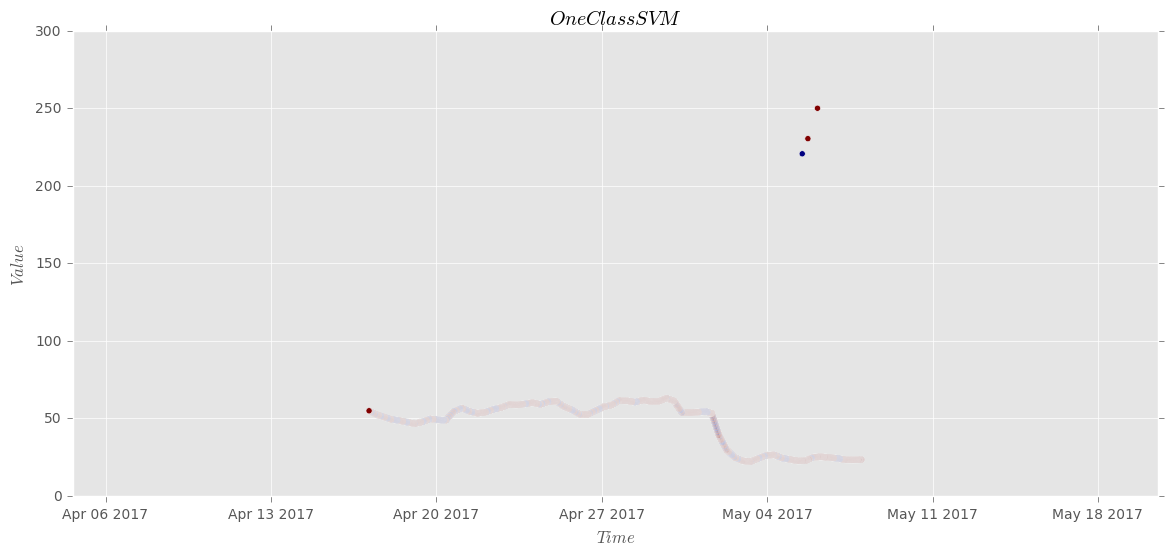

-----------------
nu =  0.0014999999999999998
num of samples in the first class :  1391    percent:  0.6961961961961962
num of samples in the secon class :  607      percent:  0.6961961961961962
[[1390  605]
 [   1    2]]
precision :  0.696741854637
recall    :  0.999281092739


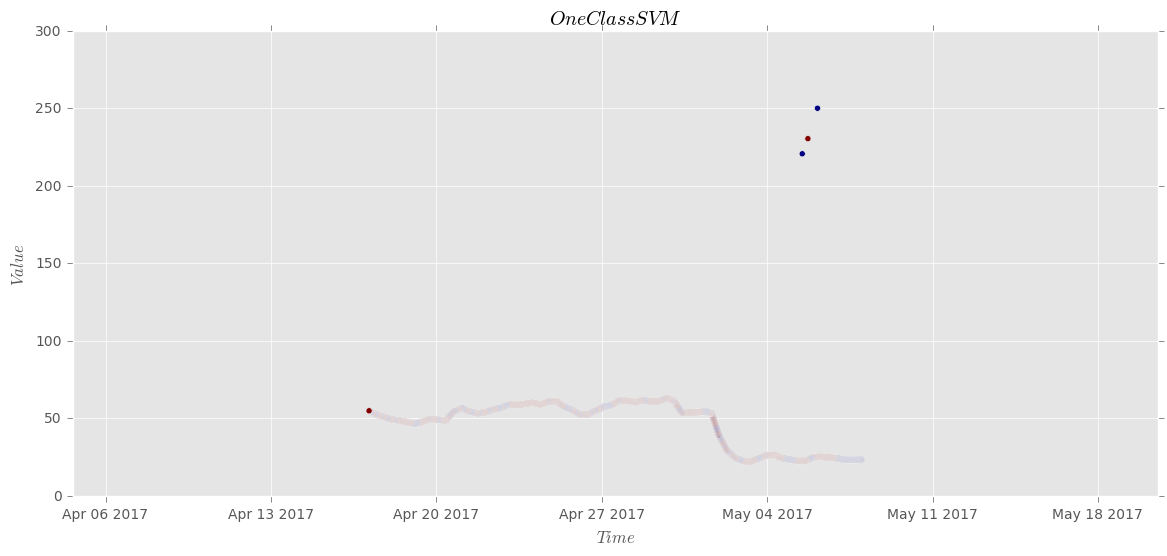

-----------------
nu =  0.0013999999999999998
num of samples in the first class :  1368    percent:  0.6846846846846847
num of samples in the secon class :  630      percent:  0.6846846846846847
[[1365  630]
 [   3    0]]
precision :  0.684210526316
recall    :  0.997807017544


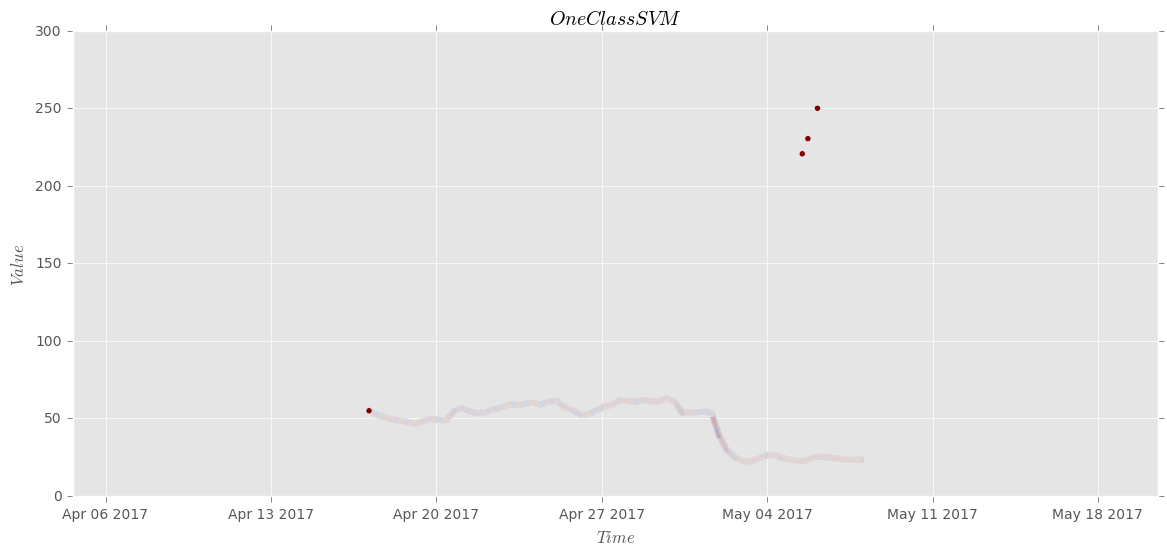

-----------------
nu =  0.0012999999999999997
num of samples in the first class :  1391    percent:  0.6961961961961962
num of samples in the secon class :  607      percent:  0.6961961961961962
[[1391  604]
 [   0    3]]
precision :  0.697243107769
recall    :  1.0


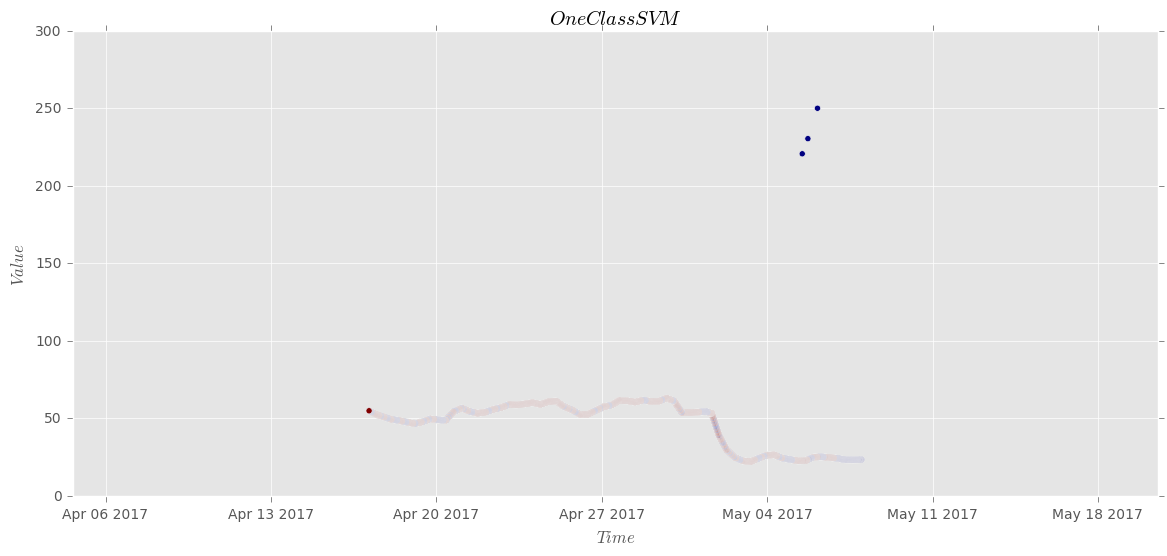

-----------------
nu =  0.0011999999999999997
num of samples in the first class :  1493    percent:  0.7472472472472472
num of samples in the secon class :  505      percent:  0.7472472472472472
[[1491  504]
 [   2    1]]
precision :  0.747368421053
recall    :  0.998660415271


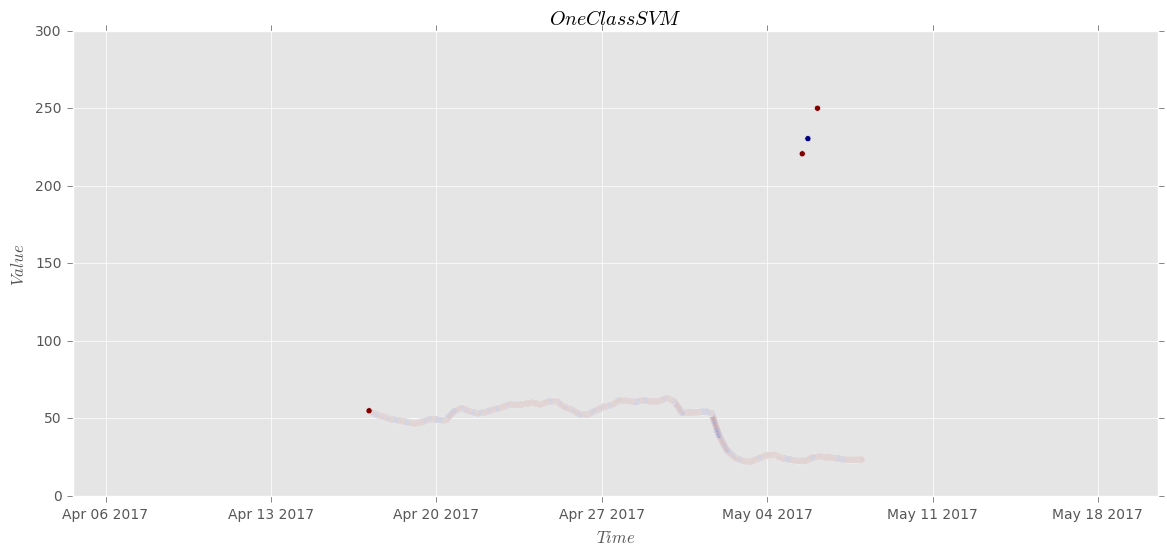

-----------------
nu =  0.0010999999999999996
num of samples in the first class :  1351    percent:  0.6761761761761762
num of samples in the secon class :  647      percent:  0.6761761761761762
[[1350  645]
 [   1    2]]
precision :  0.676691729323
recall    :  0.99925980755


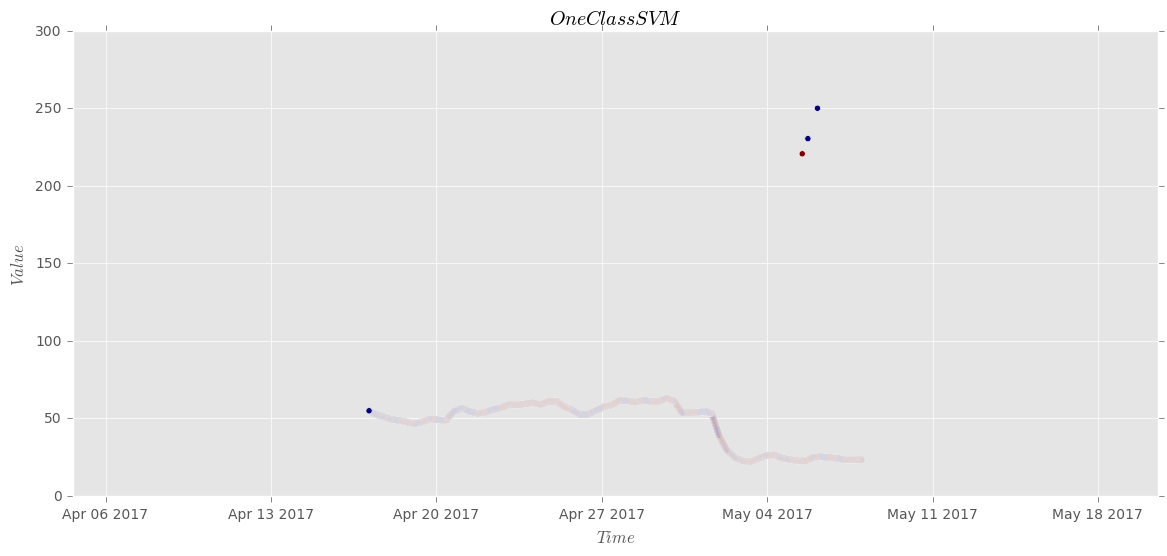

-----------------
nu =  0.0009999999999999996
num of samples in the first class :  1520    percent:  0.7607607607607607
num of samples in the secon class :  478      percent:  0.7607607607607607
[[1517  478]
 [   3    0]]
precision :  0.760401002506
recall    :  0.998026315789


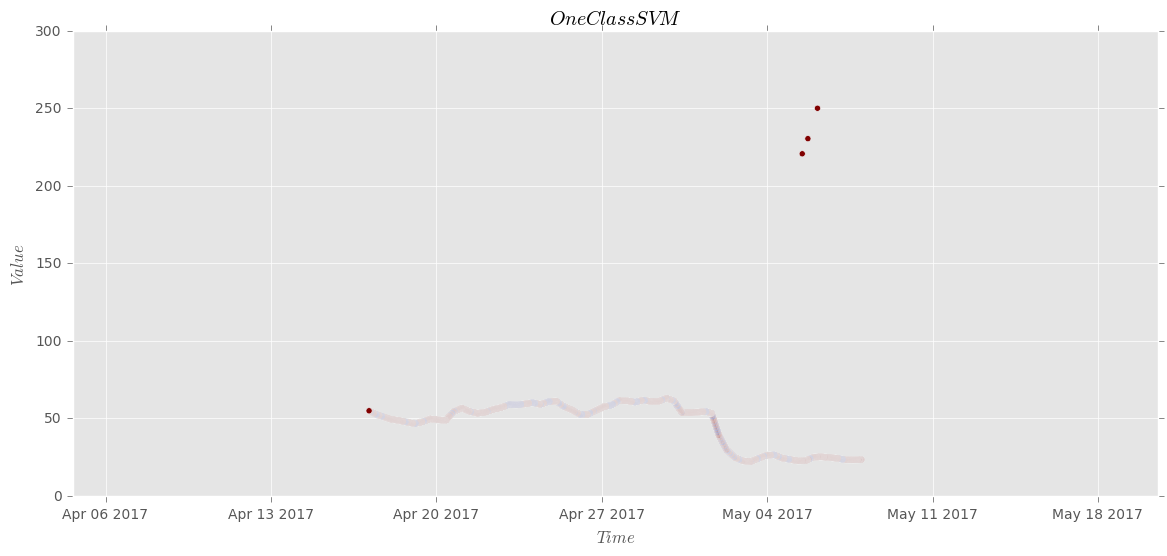

-----------------
nu =  0.0008999999999999995
num of samples in the first class :  1262    percent:  0.6316316316316316
num of samples in the secon class :  736      percent:  0.6316316316316316
[[1260  735]
 [   2    1]]
precision :  0.631578947368
recall    :  0.998415213946


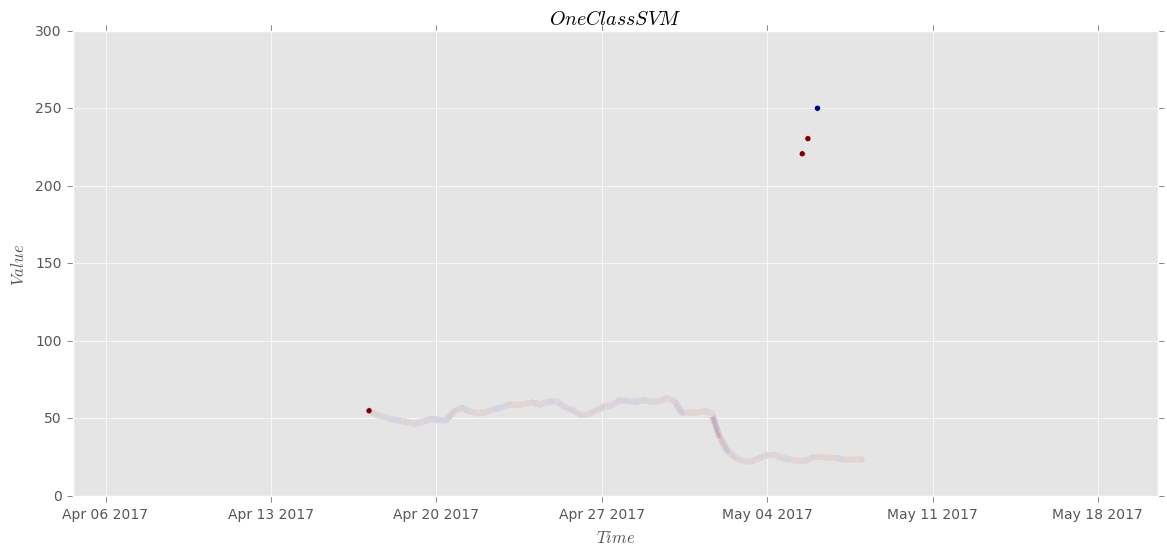

-----------------
nu =  0.0007999999999999995
num of samples in the first class :  1300    percent:  0.6506506506506506
num of samples in the secon class :  698      percent:  0.6506506506506506
[[1299  696]
 [   1    2]]
precision :  0.651127819549
recall    :  0.999230769231


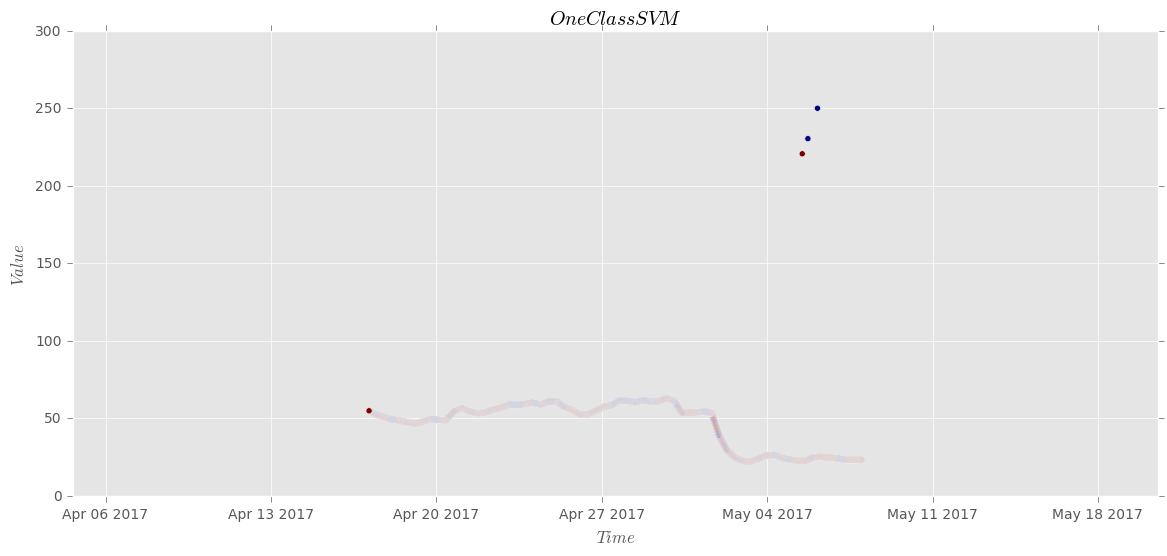

-----------------
nu =  0.0006999999999999995
num of samples in the first class :  1285    percent:  0.6431431431431431
num of samples in the secon class :  713      percent:  0.6431431431431431
[[1283  712]
 [   2    1]]
precision :  0.643107769424
recall    :  0.998443579767


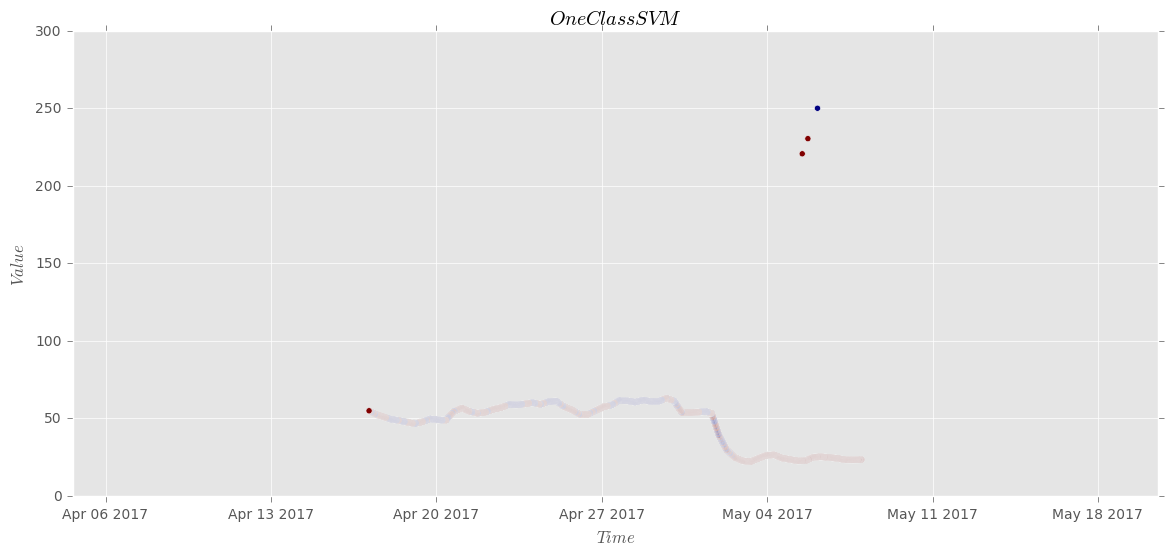

-----------------
nu =  0.0005999999999999994
num of samples in the first class :  1173    percent:  0.5870870870870871
num of samples in the secon class :  825      percent:  0.5870870870870871
[[1171  824]
 [   2    1]]
precision :  0.586967418546
recall    :  0.998294970162


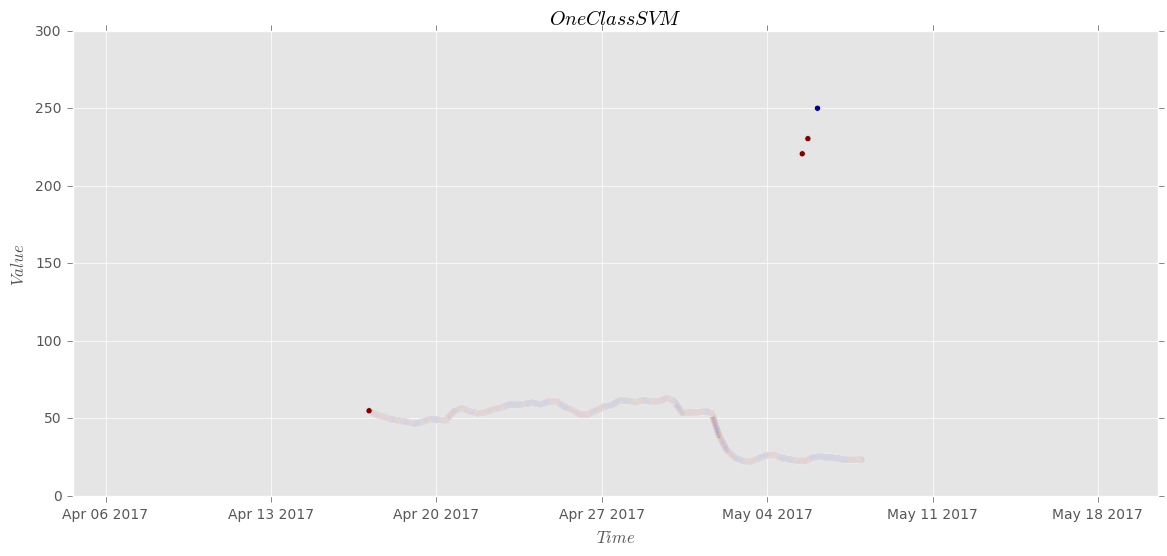

-----------------
nu =  0.0004999999999999994
num of samples in the first class :  1234    percent:  0.6176176176176176
num of samples in the secon class :  764      percent:  0.6176176176176176
[[1231  764]
 [   3    0]]
precision :  0.617042606516
recall    :  0.997568881686


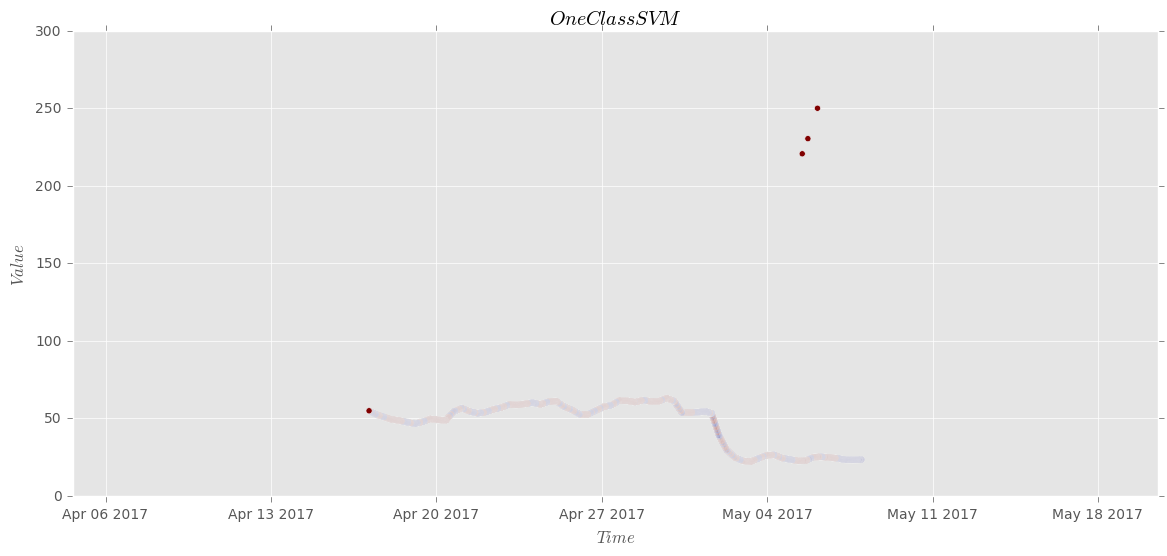

-----------------
nu =  0.00039999999999999937
num of samples in the first class :  1286    percent:  0.6436436436436437
num of samples in the secon class :  712      percent:  0.6436436436436437
[[1285  710]
 [   1    2]]
precision :  0.644110275689
recall    :  0.999222395023


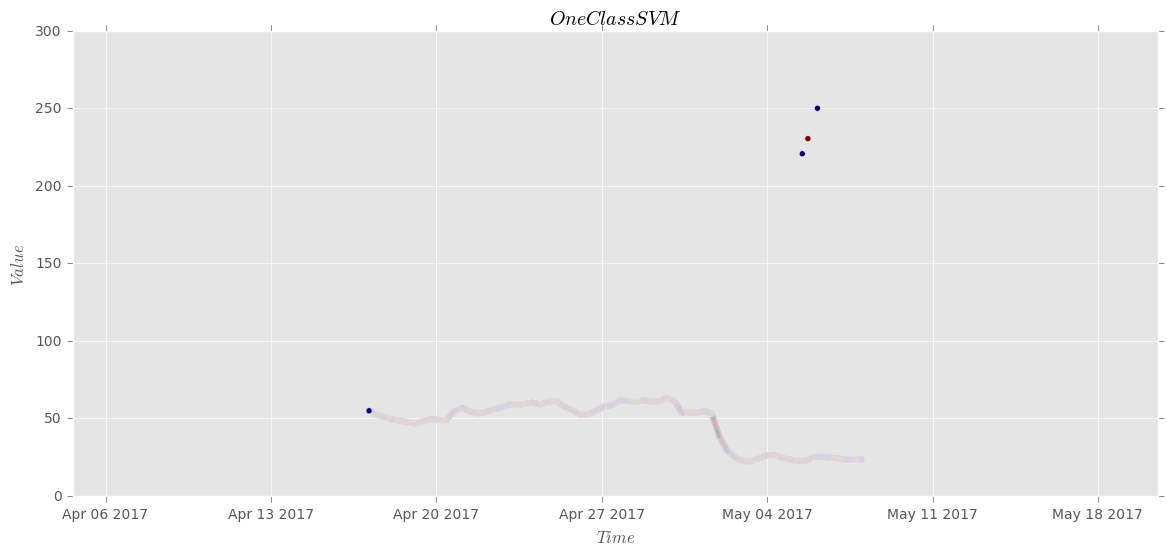

-----------------
nu =  0.0002999999999999994
num of samples in the first class :  1192    percent:  0.5965965965965966
num of samples in the secon class :  806      percent:  0.5965965965965966
[[1190  805]
 [   2    1]]
precision :  0.59649122807
recall    :  0.998322147651


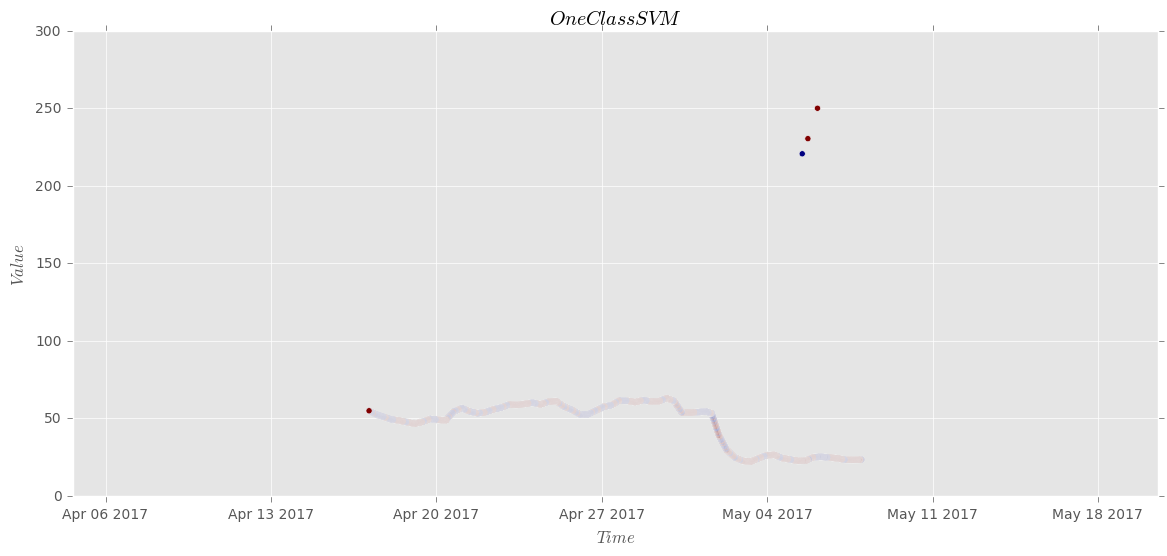

-----------------
nu =  0.00019999999999999939
num of samples in the first class :  1503    percent:  0.7522522522522522
num of samples in the secon class :  495      percent:  0.7522522522522522
[[1501  494]
 [   2    1]]
precision :  0.752380952381
recall    :  0.998669328011


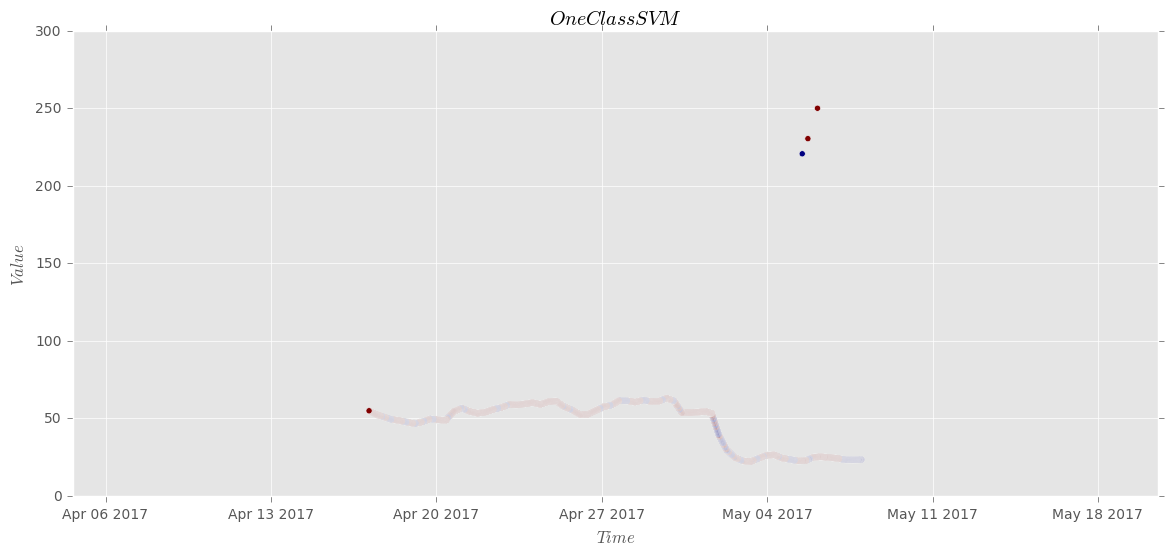

-----------------
nu =  9.999999999999938e-05
num of samples in the first class :  1096    percent:  0.5485485485485485
num of samples in the secon class :  902      percent:  0.5485485485485485
[[1094  901]
 [   2    1]]
precision :  0.548370927318
recall    :  0.998175182482


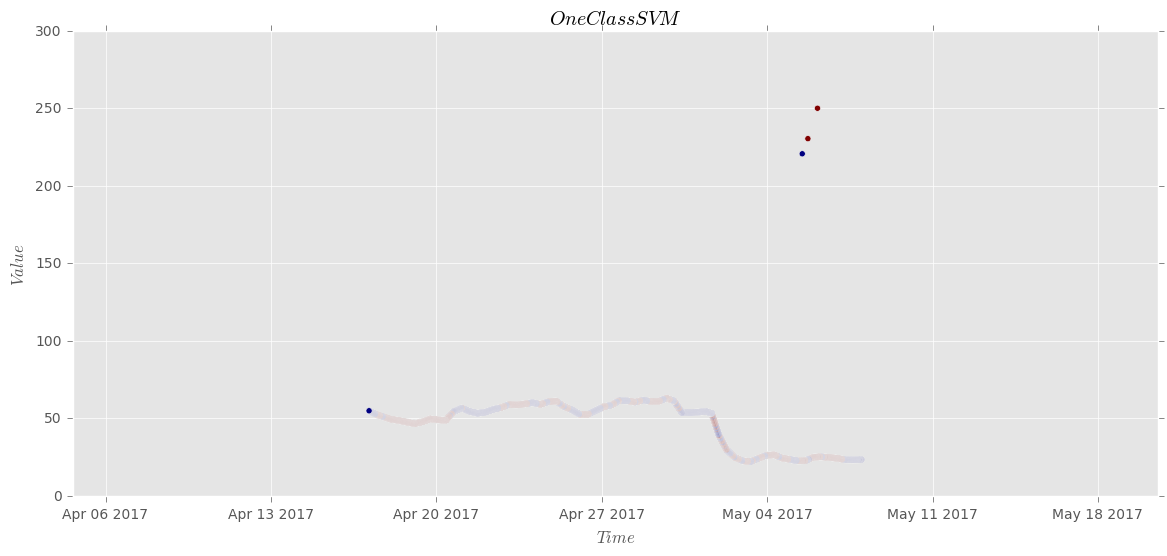

-----------------
nu = 0


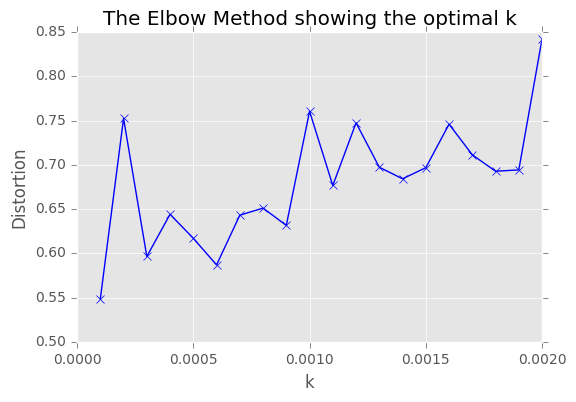

In [54]:
values = np.asarray(rowValues).reshape(-1, 1)
dates = np.asarray(rowDates)
outlierList = outlier
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]


nuList = []
preList = []

x = 0.002
while(x != 0):
    if(x > 0):
        print("nu = ", x)
        nuList.append(x)
        #clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.0001)
        clf = svm.OneClassSVM(nu=x)
        clf.fit(values)
        predicted = clf.predict(values)

        counterFirst = 0
        counterSec = 0
        counts= []
        predictedNew = []
        for i in predicted:
            if i == 1: 
                predictedNew.append(0)
                counterFirst = counterFirst + 1
            else:
                predictedNew.append(1)
                counterSec = counterSec + 1

        cm = confusion_matrix(outlierList, predictedNew)
        print ("num of samples in the first class : ", counterFirst, "   percent: ", counterFirst / len(values))
        print ("num of samples in the secon class : ", counterSec, "     percent: ", counterFirst / len(values))
        print(cm)
        precision = calculatePrecision(cm)
        recall = calculateRecall(cm)
        preList.append(precision)

        print("precision : ", precision)
        print("recall    : " ,recall)
        plotTheclusteredData(dates, values, predicted, titel= "$OneClassSVM$")
        x = x-0.0001
        print("-----------------")
    else:
        print("nu = 0")
        break
plotTheElbow(nuList ,preList)

In [ ]:
values = np.asarray(posDeltaValues).reshape(-1, 1)
dates = np.asarray(deltaDates)
outlierList = outlierPosDelta
datesDisplay = rowDates.copy()
valuesDisplay = rowValues.copy()
del datesDisplay[0]
del valuesDisplay[0]

nuList = []
preList = []

x = 0.002
while(x != 0):
    if(x > 0):
        print("nu = ", x)
        nuList.append(x)
        #clf = svm.OneClassSVM(nu=0.0001, kernel="rbf", gamma=0.0001)
        clf = svm.OneClassSVM(kernel='sigmoid', nu=x)
        clf.fit(values)
        predicted = clf.predict(values)

        counterFirst = 0
        counterSec = 0
        counts= []
        predictedNew = []
        for i in predicted:
            if i == 1: 
                predictedNew.append(0)
                counterFirst = counterFirst + 1
            else:
                predictedNew.append(1)
                counterSec = counterSec + 1

        cm = confusion_matrix(outlierList, predictedNew)
        print ("num of samples in the first class : ", counterFirst, "   percent: ", counterFirst / len(values))
        print ("num of samples in the secon class : ", counterSec, "     percent: ", counterFirst / len(values))
        print(cm)
        precision = calculatePrecision(cm)
        recall = calculateRecall(cm)
        preList.append(precision)

        print("precision : ", precision)
        print("recall    : " ,recall)
        #plotTheclusteredData(dates, values, predicted, titel= "$OneClassSVM$")
        x = x-0.0001
        print("-----------------")
    else:
        print("nu = 0")
        break
plotTheElbow(nuList ,preList)


In [ ]:
# plot the line, the points, and the nearest vectors to the plane
#Z = clf.decision_function(X)
#Z = Z.reshape(X.shape)

#print(Z)

#plt.title("OneClassSVM - posIncreases (classes)")

#plt.set_cmap(pl.cm.Paired)
#plt.contourf(Y, X, Z)

#plt.scatter(Y[:, 0], predicted[:], s=s)
#plt.scatter(Y[:, 0], predicted[:])